<h1>VESIcal: An open-source thermodynamic model engine for mixed volatile (H$_2$O-CO$_2$) solubility in silicate melts</h1>

Kayla Iacovino$^1$, Simon Matthews$^{2,3}$, Penny Wieser$^4$, Gordon M. Moore$^1$, Florence Bégué$^5$

$^1$Jacobs, NASA Johnson Space Center, Houston, TX 77058, USA
<br>$^2$Johns Hopkins University, Department of Earth and Planetary Sciences, Baltimore, MD 21218, USA
<br>$^3$University of Iceland, Institute of Earth Sciences, Askja, Sturlugata 7, 101 Reykjavik, Iceland
<br>$^4$University of Cambridge, Department of Earth Sciences, Downing Street, Cambridge CB2 3EQ, UK
<br>$^5$University of Geneva, Department of Earth Sciences, Geneva, Switzerland

**Key Points**

1. The first comprehensive volatile solubility tool capable of processing large datasets automatically
2. Seven built-in solubility models, with automatic calculation and plotting functionality
3. Built in python and easily usable by scientists with any level of coding skill

**Abstract**

Thermodynamics has been fundamental to the interpretation of geologic data and modeling of geologic systems for decades. However, more recent advancements in computational capabilities and a marked increase in researchers' accessibility to computing tools has outpaced the functionality and extensibility of currently available modeling tools. Here we present VESIcal (Volatile Equilibria and Saturation Identification calculator): the first comprehensive modeling tool for H$_2$O, CO$_2$, and mixed (H$_2$O-CO$_2$) solubility in silicate melts that: a) allows users access to seven commonly used models, plus easy inter-comparison between models; b) provides universal functionality for all models (e.g., functions for calculating saturation pressures, degassing paths, etc.); c) can process large datasets (1,000's of samples) automatically; d) can output computed data into an excel spreadsheet for simple post-modeling analysis; e) integrates advanced plotting capabilities directly within the tool; and f) provides all of these within the framework of a python library, making the tool extensible by the user and allowing any of the model functions to be incorporated into any other code capable of calling python. The tool is presented within this manuscript, which is a Jupyter notebook containing worked examples accessible to python users with a range of skill levels. The basic functions of VESIcal can also be accessed via a web app ([https://vesical.anvil.app](https://vesical.anvil.app))The VESIcal python library is open-source and available for download at [https://github.com/kaylai/VESIcal](https://github.com/kaylai/VESIcal).

**Plain Language Summary**

To be written after first full draft is complete.

# Introduction

Understanding the solubility and degassing of volatiles in silicate melts is a crucial component of modeling volcanic systems. As dissolved components, volatiles (primarily H$_2$O and CO$_2$) affect magma viscosity, rheology, and crystal growth. In addition, due to the strong dependence of volatile solubility on pressure, measured volatile concentrations in preserved high-pressure melts (i.e., inclusions of liquid magma within crystals that can be collected at the surface) can be used to determine pre-eruptive magmatic storage pressures, and thus depths. Importantly, volatile exsolution-driven overpressure of a magmatic system is likely the trigger of many explosive volcanic eruptions (Tait et al., 1989; Blake, 1984; Stock et al., 2016). Once triggered, further drops in magmatic pressure caused by ascent of magma within a volcanic conduit result in the continuous exsolution of volatiles from the melt. Volatile elements experience a large positive volume change when moving from a dissolved to exsolved free fluid state. This expansion fuels a dramatic increase in the magma's buoyancy, which can often lead to a runaway effect in which the ascent and degassing of volatile-bearing magma eventually erupts at the surface in an explosive fashion. Working in concert with seismic and gas monitoring data, pre-eruptive magmatic volatile concentrations as well as solubility and degassing modelling can be used in forensic and sometimes in predictive scenarios, helping us to understand and potentially mitigate the effects of explosive eruptions. 

All of these processes depend directly on the solubility -- or the capacity of a magma to hold in solution -- of volatile elements. Over the last several decades, a veritable explosion of new volatile solubility data has opened the door to a plethora of models to describe the solubility of H$_2$O, CO$_2$, or mixed H$_2$O-CO$_2$O fluid in magmas covering a wide compositional, pressure, and temperature range. Volatile solubility is highly dependent upon the composition of the host magma, making already challenging experiments more onerous to perform to encapsulate the range of magmas seen in nature. The most fundamental models (Stolper, 1982; Dixon et al., 1995; Moore et al. 1998) focus on a specific range of magma bulk compositions (e.g., basalt or rhyolite only). Later studies filled in compositional gaps, some with an increased focused on mixed-volatile (H$_2$O-CO$_2$) studies, increasing the natural applicability of our models to more systems (Liu et al., 2005; Iacono-Marziano et al., 2012; Iacovino et al., 2013). To date, there have been only a few significant efforts to create a holistic thermodynamic model calibrated by a wide range of data in the literature. The most popular are MagmaSat (the mixed-volatile solubility model built into the software package MELTS v. 1.2.0; Ghiorso and Gualda, 2015) and the model of Papale et al. (2006). Of these two, only MagmaSat has made its code available; very recently MagmaSat has been made accessible via the ENKI thermodynamic python framework (http://enki-portal.org/).

Despite this communal wealth of solubility models, quantitative calculations of volatile solubility, and by extension saturation pressures, equilibrium fluid compositions, and degassing paths, remains a time-consuming endeavor. Modeling tools that are available are typically unable to process more than one sample at a time, requiring manual entry of the concentrations of 8-10 major oxides, temperature, as well as CO$_2$ and H$_2$O concentrations to calculate saturation pressures, or X$_{H2O}$ to calculate dissolved volatile contents. This is particularly problematic for melt inclusion studies, where saturation pressures are calculated for hundreds of inclusions, each with different entrapment temperatures, CO$_2$, H$_2$O, and major element concentrations. For example, the saturation pressures from 105 Gakkel ridge melt inclusions calculated in MagmaSat by Bennet et al. (2019) required the manual entry of 1,365 values! The potential for user error in this data entry stage should not be overlooked.

In many cases, newly published solubility models do not include an accompanying tool, requiring users to correctly combine and interpret the relevant equations (e.g., Dixon et al., 1995; Dixon, 1997; Liu et al., 2005; Shishkina et al., 2014). This is problematic from a perspective of reproducibility of the multitude of studies utilizing these models, especially given that some of the equations in the original manuscripts contain typos or formatting errors. For some models, an excel spreadsheet was provided, or available at request from the authors. For example, Newman and Lowenstern (2002) included a simplified version of the Dixon (1997) model as part of “VolatileCalc”, which was written in Visual Basic for Excel. Due to its simplicity, allowing users to calculate saturation pressures, degassing paths, isobars and isopleths with a few button clicks and pop-up boxes, this tool has proved extremely popular (with 741 citations at the time of writing). However, to calculate saturation pressures using VolatileCalc, the user must individually enter the SiO$_2$, H$_2$O, CO$_2$ content and temperature of every single sample into pop-up boxes. Similarly, the excel spreadsheet for the Moore et al. (1998) model calculates dissolved H$_2$O contents based on the concentration of 9 oxides, temperature, and the fraction of X$_{H_{2}O}$ in the vapor, which must be pasted in for every sample. Finally, Allison et al. (2019) provide an excel spreadsheet that allows users to calculate fugacities, partial pressures, isobars, isopleths and saturation pressures. Again, parameters for each sample must be entered individually, with no way to calculate large numbers of samples automatically. 

Some of these published models and tools are at risk of being lost to time, since spreadsheet tools (particularly earlier studies published before journal-provided hosting of data and electronic supplements was commonplace) must be obtained by request to the author. More recently, authors have provided web-hosted interfaces to calculating saturation pressures and dissolved volatile contents (e.g., Iacono-Marziano et al., 2012; http://calcul-isto.cnrs-orleans.fr/, and Ghiorso and Gualda, 2015; http://melts.ofm-research.org/CORBA_CTserver/GG-H2O-CO2.html). Ghiorso and Gualda (2015) also provide a Mac application. While more accessible in the present time, this does not negate the issue of the longevity of these models. The link provided in the Iacono-Marziano et al. (2012) manuscript returns an error “this site cannot be reached”, although email contact with the author directed us towards the newer link given above. Similarly, the link to the H$_2$O-CO$_2$ equation of state web calculator that Duan and Zhang (2006) provided in their manuscript returns a 404 error. 

While we certainly advocate for the continued refinement of solubility models, including the completion of new experiments in poorly studied yet critical compositional spaces such as andesites (Wieser et al., in prep), a perhaps more crucial step at this juncture is in the development of a tool that can apply modern computational solutions to making our current knowledge base of volatile solubility in magmas accessible and enduring.

Here we present VESIcal (Volatile Equilibria and Saturation Identification calculator): a python-based thermodynamic volatile solubility model engine that incorporates the seven most popular volatile solubility models under one proverbial roof. VESIcal is capable of performing a wide array of calculations on large datasets automatically. But, importantly, VESIcal has been designed for practicality and ease of use. It is designed to be used by anyone, from someone who is completely unfamiliar with coding to an adept programmer. The non-coder user can interact with VESIcal through a webapp (https://vesical.anvil.app) or directly within this manuscript, which utilizes the user-friendly Jupyter Notebook format, allowing them to upload a file with data, execute the various example calculations provided below, and save the results to an Excel file to work with outside of VESIcal. This notebook also incorporates built-in plotting options for easy visualization of user data and calculated results. More experienced programmers may wish to use the more advanced functionality provided by VESIcal, including the ability to hybridize models (e.g., use one model for H$_2$O and another for CO$_2$) or write their own routines and code calling VESIcal methods. VESIcal is an open source tool and as such is far less prone to the preservation issues discussed above. Because the VESIcal code is hosted on GitHub, every change to the code is tracked publicly (Perkel, 2016). VESIcal’s current release (version 0.1.1) is also archived on Zenodo, which provides a static citable DOI (10.5281/zenodo.4096463) for the current version of the code, along with a snapshot of the GitHub repository at the time of release.

Models included in VESIcal are:

1. MagmaSat: VESIcal's default model. The mixed-volatile solubility model within MELTS v. 1.2.0 (Ghiorso and Gualda, 2015)
2. Dixon: The simplification of the Dixon (1997) model as implemented in VolatileCalc (Newman and Lowenstern, 2002)
3. MooreWater: (Moore et al. 1998; water only, but H$_2$O fluid concentration can be specified)
4. Liu: (Liu et al 2005)
5. IaconoMarziano: (Iacono-Marziano et al. 2012)
6. Shishkina: (Shishkina et al. 2014)
7. AllisonCarbon (Allison et al. 2019, carbon only)

Note that the above model names are given in terms of how to call them within VESIcal (e.g., `model='MooreWater'`).

As any individual model is only valid within its calibrated range (see below), and each model is parameterized and expressed differently (e.g., empirical vs. thermodynamic models), it is impractical to simply combine them into one large model. Instead, VESIcal is a single tool that can access and utilize all of these models, with an extensive pressure-temperature-composition calibration range (Fig. 1). VESIcal represents the first volatile solubility tool with the ability to perform calculations for multiple samples at once, with built-in functionality for extracting data from an Excel file.  In addition, the code is written such that it is flexible (sample, calculation type, and model type can be chosen discreetly) and extensible (VESIcal code can be easily imported for use in python scripts, and the code is formatted such that new volatile models can be easily added). 

All of the calculations implemented in VESIcal can be performed using any of the models included. The code is structured by calculation rather than by model, which provides an intuitive way for users to interact with the code and compare outputs from multiple models. A python class is defined for each calculation. These classes can be called as python methods, take the model name and any applicable data as arguments, and return the results of the calculation. Each class performs five key functions: 1) creates the requested model object and performs any necessary pre-processing (e.g., ensuring relevant data are present; normalizing data); 2) takes user input and performs the mathematical calculation; 3) does any necessary processing of the output (e.g., normalizing totals); 4) checks that the model is being used within its calibrated range; and 5) returns calculated outputs in an intuitive and manipulatable format (e.g., a python dictionary, a figure, or a pandas DataFrame). Results of calculations can easily be saved to one or more Excel files (.xslx). To demonstrate that VESIcal returns results which are comparable with pre-existing tools, we have performed a number of tests, which are described in the Supplementary Information (Text S2).

This tool has enormous potential to increase our understanding of igneous systems. A detailed history of volatile solubility modeling and the implications of VESIcal are explored in detail in the companion manuscript to this work, Wieser et al. (in prep). As discussed above, calculating saturation pressures for melt inclusions using existing tools is an incredibly time-consuming pursuit, requiring hundreds to thousands of individual numbers to be manually entered. As a result, very few studies have compared the sensitivity of their pressure estimates to the choice of solubility model, or propagated errors inherent to measurements of volatile concentrations in melts using SIMS, FTIR and Raman Spectroscopy into an error bar in terms of saturation pressure. In contrast, VESIcal allows users to import an excel spreadsheet with each row containing the major element and volatile contents of each inclusion, as well as a temperature at which to evaluate solubility. Using the batch calculation functions, VESIcal will automatically calculate the saturation pressure for each row, using a user-specified model. Thus, users can easily compare results from different solubility models, to robustly assess their applicability for the system of interest. Additionally, users could easily load a different spreadsheet, where the CO$_2$ and H$_2$O concentrations are adjusted to reflect the analytical uncertainty on the instrument used, allowing error bars on the saturation pressure to be calculated for every single inclusion. The open-source nature of VESIcal also allows the vast capabilities of Python3 to be applied to modeling of solubility in magmas. For example, users could utilize Markov chain Monte Carlo (MCMC) methods to robustly calculate error distributions for each sample.

# Research Methodology

Navigating the array of models implemented in VESIcal can be challenging. How can a user determine which model best suits their needs? MagmaSat (the default model in VESIcal) is the most widely calibrated in P-T-X space, and so we recommend it for the majority of cases. Where a user wishes to use the other implemented models, we provide some tools to help choose the most appropriate model (see Supplement). These tools are described in more detail in Section 3.2 on comparing user data to model calibrations.

**Table 1. Calibration ranges of VESIcal models**

![Description](tables/Table1.png)

**Figure 1**

![Description](figures/Figure1.png)

*Figure 1 - Illustrations showing the calibrated ranges of VESIcal models in pressure-temperature space. Plots are subdivided into experiments performed with mixed (H$_2$O-CO$_2$), H$_2$O-only, and CO$_2$-only fluids.*

## Model Calibrations and Benchmarking

The pressure, temperature, and composition calibration ranges of the seven models implemented in VESIcal are shown in Table 1 and Figure 1. VESIcal abides by statements of caution made by the authors of these models regarding their extrapolation by informing the user if a calculation is being performed outside of a model's calibrated range. In this case, the code returns a warning message, which is as specific as possible, along with the requested output.  We also provide several Jupyter notebooks in the supplementary material (Supplementary files Sx-Sy), allowing users to plot their data amongst the calibrations of the different models to assess their suitability for less objective measures. Detailed descriptions of the seven solubility models implemented in VESIcal, including information about their calibration range in terms of melt composition, pressure, and temperature, are given in Wieser et al. (in prep).

Significant testing was undertaken to ensure that VESIcal faithfully reproduces the results of all incorporated models. All models underwent multiple tests, the results of which are shown in the supplement (Supplemental Archive File S1). VESIcal reproduced the results from previous tools (e.g., web apps, Excel spreadsheets) to within ±5% relative. MagmaSat, VESIcal’s default model, underwent three tests, the results of which are shown in Fig. 2: 1. Comparison of saturation pressures from MORB melt inclusions in VESIcal to those published by Bennett et al. (2019), who used the MagmaSat Mac App (R$^2$=0.99998; Fig. 2a); 2. Comparison of fluid composition (X$_{H_{2}O}$) calculated with VESIcal and the web app (R$^2$=0.999, identical considering the web app returns 2dp; Fig. 2b); 3. Comparison of isobars for the Early Bishop Tuff calculated with VESIcal (star symbols) and isobars published in Fig. 14 of Ghiorso and Gualda (Fig. 2c).

**Figure 2**

![Description](figures/Figure2.png)

*Figure 2 - Benchmarking of VESIcal against MagmaSat. a. Comparison of saturation pressures calculated with VESIcal against those by Bennett et al. (2019) using the MagmaSat app for Mac. Samples are all MORB melt inclusions, and pressures were calculated at a temperature unique to each sample. b. Equilibrium fluid compositions calculated with VESIcal against those calculated with the MagmaSat web app. c. Individual points along the 1,000, 2,000, and 3,000 bar isobars for the Early Bishop Tuff rhyolite calculated with VESIcal (stars) and plotted atop isobars published in Fig. 14 of Ghiorso and Gualda (2015).*

## Format of the python library
In this section, the basic organization and use cases of VESIcal are discussed. VESIcal relies heavily on python pandas, a python package designed for working with tabulated data. Knowledge of pandas is not required to use VESIcal, and we refer the user to the pandas documentation for an overview of the package (https://pandas.pydata.org/pandas-docs/stable/userguide/index.html).

Specific details on how to perform model calculations are discussed in Section 3 and include worked examples. The VESIcal library is written so that users can interact first and foremost with the calculation they want to perform. Five standard calculations can be performed with any model in the library: 1. `calculate_dissolved_volatiles()`; 2. `calculate_equilibrium_fluid_composition()`; 3. `calculate_saturation_pressure()`; 4. `calculate_isobars_and_isopleths()` (plus functionality for plotting; only for mixed volatiles models); and 5. `calculate_degassing_path()` (plus functionality for plotting; only for mixed volatiles models).

Fig. 3 illustrates the basic organization of the code. First, the user determines which calculation they wish to perform by accessing one of the five core calculation classes (listed above). In this step, the user specifies any input parameters needed for the calculation (e.g., sample composition in wt% oxides, pressure in bars, temperature in $^{\circ}$C, and fluid composition "X_fluid" in terms of XH$_2$O$^{fluid}$) as well as the model they wish to use. The default model is MagmaSat, but the user may specify any model in the library. As an example, the code to calculate the saturation pressure of some sample using the MagmaSat model would be written as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0).result`

where `mysample` is a variable (python dictionary or pandas Series) containing the composition of the sample in oxide wt%, and the temperature is given in $^{\circ}$C. If a different model is desired, for example Shishkina et al. (2014), it can be passed as:

`calculate_saturation_pressure(sample=mysample, temperature=850.0, model='Shishkina').result`

The core calculation classes each perform two functions: 1) a check is performed to ensure that the user input is within the model's recommended calibration range; 2) the `calculate()` method sends the user input to the appropriate model. 

**Figure 3**

![Fig. 3](figures/Figure3.png)

*Figure 3 - Flowchart illustrating the basic organization of the python library. First, a user chooses a calculation to perform and calls one of the five core calculation classes. Here, any necessary parameters are passed such as sample composition, pressure, and temperature. A check is run to ensure the calculation is being performed within model-specified limits. The Calculate() class then calls on one of the Model() classes. The default model is MagmaSat, but a user may specify a different model when defining the calculation parameters. Standard pre-processing is then performed on the input data, and this pre-processing step is unique to each model. The processed data are then fed into a model-specific method to perform the desired core calculation.*
<hr>

To facilitate both ease of use and flexibility in model application, we have structured the code such that users can follow one of two computational paths: a batch processing path and a single sample path (more advanced options). The level of simplicity of either path is indirectly proportional to the level of customization and extensibility (Fig. 4). 

The "simplest" way to interact with VESIcal within a python script (i.e., discounting the web app) is via the batch processing path. Here, the user provides input data in the form of a Microsoft Excel spreadsheet (.xlsx file) and instructs the model to perform whatever calculation is desired. The model returns data formatted like a Microsoft Excel spreadsheet, which contains the user's original input data plus whatever model outputs were calculated. The user can continue to work with returned data by saving the result to a variable (as is shown in all examples in this manuscript). Data can then be exported to an excel file with a simple command (see Section 3.10).

The more advanced calculation path is the most fundamental: the user has direct access to all model functions and can even hybridize models. This path allows the user to input information in a variety of ways without being constrained to formatting the input data in a particular way or naming scheme. This also gives the user more flexibility in integrating any VESIcal model function into some other python code.

**Figure 4**

![Fig. 4](figures/Figure4.png)

*Figure 4 - Flowchart illustrating the different operational paths. On top, batch calculation is shown, in which an Excel file with any amount of samples is fed into the model, calculations are performed, and the original user data plus newly calculated values are returned and can be saved as an Excel file. Below, single-sample calculation is shown. These methods can run calculations on one sample at a time, but multi-sample calculations can be performed iteratively with code written by the user. Calculated values are returned as a variable. For single-sample calculations, more advanced modeling options can be set, and hybridization of models can be performed.*
<hr>

## Running the code
VESIcal can be used in a number of ways: via this Jupyter notebook, via the VESIcal web app, or by directly importing VESIcal into any python script. 

VESIcal was born from functionality provided by ENKI and so all the files necessary to use VESIcal are hosted on the ENKI server (http://enki-portal.org/). A unique personal coding environment can be initiated by logging into the ENKI production server using a GitLab username and password (which is free to obtain; see directions on the ENKI website for specifics). The simplest way to use VESIcal while retaining all of its functionality is within this very manuscript, in the form of a Jupyter notebook. Because this manuscript and VESIcal python library files are hosted on the ENKI server, code can be manipulated and executed in the code cells below. Making changes won't affect the public version of this manuscript. Likewise, any user can write their own python code using VESIcal by creating a Jupyter notebook on the ENKI server and importing VESIcal as is demonstrated in the code below. 

Computation time on the ENKI server is limited by the server itself. VESIcal may run faster if installed locally. Advanced instructions on installing VESIcal on your own computer are provided in the Supplement (Supplementary Text S1).

The most limited but simplest method to interacting with VESIcal is through the web app (https://vesical.anvil.app). The web app can currently perform three of the five core calculations in batch process mode (via upload of an Excel spreadsheet). Some, but not all, optional parameters can be set.

**To run the code in this notebook**, nothing needs to be installed. Simply execute the code cells below, changing parameters as desired. Custom data may be processed by uploading an excel file into the same folder containing this notebook and then changing the filename in Section 3.1. 

## Documentation
This manuscript serves as an introduction to the VESIcal library aimed at python users of all levels. However, the code itself is documented with explanations of each method, its input parameters, and its returned values. This documentation can be accessed at our readthedocs website (https://vesical.readthedocs.io/).

Video tutorials are also available on the VESIcal YouTube (https://www.youtube.com/channel/UCpvCCs5KMXzOxXWm0seF8Qw). Currently, the first tutorial covers the basics of VESIcal. More videos for specific features and uses are planned.

## Generic methods for calculating mixed-fluid properties

VESIcal provides a set of methods for calculating the properties of mixed CO$_2$-H$_2$O fluids, which can be used with any combination of H$_2$O and CO$_2$ solubility model. The use of generic methods allows additional models to be added to VESIcal by defining only the (simpler) expressions describing pure fluid solubility. Non-ideality of mixing in the fluid or magma phases can be incorporated by specifying activity and fugacity models. A complete description of these methods, including all relevant equations, can be found in the Supplement (Supplementary Text S2).

# Workable example uses

In this section we detail how to use the various functions available in VESIcal through worked examples. The python code presented below may be copied and pasted into a script or can be edited and executed directly within the Jupyter notebook version of this manuscript. For all examples, code in sections 3.0.2 and 3.1 must be executed to initialize the model and import data from the provided companion excel file. The following sections then may be executed on their own and do not need to be executed in order.

In each example below, a generic "method structure" is given along with definitions of unique, required, and optional user inputs. The method structure is simply for illustrative purposes and gives default values for every argument (input). In some cases, executing the method structure as shown will not produce a sensible result. For example, the default values for the `plot()` function (Section 3.8) contain no data, and so no plot would be produced. Users should replace the default values shown with values corresponding to the samples or conditions of interest.

All examples will use the following sample data by default (but this can be changed by the user):
- Dataset from example_data.xlsx  loaded in Section 3.1.1 (variable name `myfile`)
- Single composition defined in Section 3.1.2 (variable name `mysample`)
- Sample 10* extracted from example_data.xlsx dataset in Section 3.1.3 (variable name `sample_10`)

Calculations performed on single samples or on a dataset imported from an Excel file containing many samples are executed in two distinct ways. Note that single sample calculations require that the argument `sample` be defined and are always appended with `.result` at the end of the function call. Batch calculations are performed on the dataset itself, after that dataset is imported into VESIcal. Thus, the `sample` argument does not need to be defined discretely, since sample compositional information is stored within the dataset object. The two basic function calls (i.e., how a user would write code to perform a calculation) are:

*Single sample calculations*
>`myvariable = v.name_of_the_core_calculation(sample=mysample, argument1=value1, argument2=value2).result`

*Batch calculations*
>`myvariable = myfile.name_of_the_core_calculation(argument1=value1, argument2=value2)`

where VESIcal has been imported as `v`, `myvariable` is some arbitrary variable name to which the user wishes to save the calculated output, `name_of_the_core_calculation` is one of the five core calculations, `mysample` is a variable containing compositional information in wt% oxides, `myfile` is a variable containing an ExcelFile object created by importing an Excel file, and `argument1`, `argument2`, `value1`,  and `argument2` are two required or optional arguments and their user-assigned values, respectively.

Workable examples detailed here are:
1. [Loading, viewing, and preparing user data](#loading_viewing_preparing)<br>
    1.1. [Loading an Excel file](#batch_processing)<br>
    1.2. [Defining a single sample composition](#defining_single_sample)<br>
    1.3. [Plotting user data](#plotting_user_data)<br>
    1.4. [Extracting a single sample from an Excel file](#extracting_single_melt_composition)<br>
    1.5. [Normalizing and transforming data](#normalizing_transforming_data)<br>
2. [Calculating dissolved volatile concentrations](#calculating_dissolved_volatile_concentrations)
3. [Calculating equilibrium fluid compositions](#calculating_equilibrium_fluid_compositions)
4. [Calculating saturation pressures](#calculating_saturation_pressures)
5. [Calculating and plotting isobars and isopleths](#calculating_plotting_isobars_isopleths)
6. [Calculating and plotting degassing paths](#calculating_plotting_degassing_paths)
7. [Plotting multiple calculations](#plotting_multiple_calculations)
8. [Comparing results from multiple models](#comparing_results_from_multiple_models)
9. [Code hybridization (Advanced)](#code_hybridization)
10. [Exporting data](#exporting_data)


### Function arguments and their definitions
Each section below details what arguments are required or optional inputs and gives examples of how to perform the calculations. Table 2 lists all arguments, both required and optional, used in the five core calculations. Many of the function arguments have identical form and use across all calculations, and so we list these here. Any special cases are noted in the section describing that calculation.

The most commonly used arguments are:
>`sample` *Single sample calculations only* The composition of a sample. A single sample may be passed as a dictionary of values, with compositions of oxides in wt%. This argument is not needed for batch calculations since they are performed on ExcelFile objects, which already contain sample information. See examples for details.

>`temperature`, `pressure`, and `X_fluid`: the temperature in $^{\circ}$C, the pressure in bars, and the mole fraction of H$_2$O in the H$_2$O-CO$_2$ fluid, XH$_2$O$^{fluid}$. In all cases, `X_fluid` is optional, with a default value of 1 (pure H$_2$O fluid). Note that that `X_fluid` argument is only used for calculation of dissolved volatile concentrations.<br>
&nbsp;<br>
*For single sample calculations*<br>
Temperature, pressure, and X fluid should be specified as a numerical value.<br>
&nbsp;<br>
*For batch calculations*<br>
Temperature, pressure, and X_fluid can either be specified as a numerical value or as strings referring to the names of columns within the Excel file containing temperature, pressure, or X_fluid values for each sample. If a numerical value is passed for either temperature, pressure, or X_fluid, that will be the value used for one or all samples. If, alternatively, the user wishes to use temperature, pressure, and/or X_fluid information in their ExcelFile object, the title of the column containing temperature, pressure, or X_fluid data should be passed in quotes (as a string) to `temperature`,  `pressure`, and/or `X_fluid`, respectively. Note for batch calculations that if temperature, pressure, or XH$_2$O$^{fluid}$ information exists in the ExcelFile but a single numerical value is defined for one or both of these variables, both the original information plus the values used for the calculations will be returned.

>`verbose`: *Only for single sample calculations* Always an optional argument with a default value of False. If set to True, additional values of interest, which were calculated during the main calculation, are returned in addition to the results of the calculation.

>`print_status`: *Only for batch calculations* Always an optional argument, which sometimes defaults to True and other times defaults to False (see specific calculation section for details). If set to True, the progress of the calculation will be printed to the terminal. The user may desire to see the status of the calculation, as some calculations using MagmaSat can be somewhat slow, particularly for large datasets.

>`model`: Always an optional argument referring to the name of the desired solubility model to use. The default is always "MagmaSat". 


**Table 2: Matrix of all arguments used in the five core calculations, the nature of the argument (required or optional) and the input type or default value.**
![Description](tables/argument_table.png)

### Initialize packages

For any code using the VESIcal library, the library must be imported for use. Here we import VESIcal as v. Any time we wish to use a function from VESIcal, that function must be preceded by '`v.`' (e.g., v.calculate_saturation_pressure). Specific examples of this usage follow. Here we also import some other python libraries that we will be using in the worked examples below.

In [1]:
import sys
sys.path.insert(0, '../')

import VESIcal as v
import pandas as pd

#The following are options for formatting this manuscript
pd.set_option('display.max_colwidth', 0)
from IPython.display import display, HTML
%matplotlib inline

## Loading, viewing, and preparing user data

All of the following examples will use data loaded in the code cells in this section. Both batch processing of data in an Excel file and single-sample processing are shown. An example file called 'example_data.xlsx' is included with this manuscript. You can load in your own data by first ensuring that your file is in the same folder as this notebook and then by replacing the filename in the code cell below with the name of your file. The code cell below must be executed for the examples in the rest of this section to function properly.

### Batch processing
Batch calculations are always facilitated via the `ExcelFile()` class, which the user uses to specify the filename corresponding to sample data. Loading in data is as simple as calling `ExcelFile(filename)`. Optionally, `input_type` can be used to specify whether the oxide data are in wt%, mol fraction, or mol%. Calculations will always be performed and returned with melt composition in wt% and fluid composition in mol fraction.

**Structure of the input file:** A file containing compositions (and optional pressure, temperature, or XH$_2$O$^{fluid}$ information) on one or multiple samples can be loaded into VESIcal. The loaded file must be a Microsoft Excel file with the extension .xls or .xlsx. The file must be laid out in the same manner as the example file 'example_data.xlsx'. The basic structure is also shown in Table 3. 

Any extraneous columns that are not labeled as oxides or input parameters will be ignored during calculations. The first column titled 'Label' contains sample names. Note that the default assumption on the part of VESIcal is that this column will be titled 'Label'. If no 'Label' column is found, the first non-oxide column name will be set as the index column, meaning this is how samples can be accessed by name (see Section 3.1.3). An index column can be specified by the user using the argument `label` (see documentation below). The following columns must contain compositional information as oxides. The only allowable oxides are: SiO$_2$, TiO$_2$, Al$_2$O$_3$, Fe$_2$O$_3$, FeO, Cr$_2$O$_3$, MnO, MgO, CaO, NiO, CoO, Na$_2$O, K$_2$O, P$_2$O$_5$, H$_2$O, and CO$_2$. Currently, VESIcal can only read these oxide names exactly as written (e.g., with no leading or trailing spaces and with correct capitalization), but functionality to interpret variations in how these oxides are entered is planned (e.g., such that "sio2. " would be understood as "SiO2"). All of these oxides need not be included; if for example your samples contain no NiO concentration information, you can omit the NiO column. Omitted oxide data will be set to 0 wt\% concentration. If other oxide columns not listed here are included in your file, they will be ignored during calculations. Compositions can be entered either in wt% (the default), mol%, or mole fraction. If mol% or mole fraction data are loaded, this must be specified when importing the tile.

Because VESIcal may misread column headings, we highly recommend that users examine their data after loading into VESIcal and before performing calculations. The user data, as it will be used by VESIcal, can be viewed at any time with `myfile.data` (see generation of Table 3 below).

Pressure, temperature, or XH$_2$O$^{fluid}$ data may optionally be included, if they are known. Column names for these data do not matter, as they can be specified by the user as will be shown in following examples.

The standard units used by VESIcal are always pressure in bars, temperature in $^{\circ}$C, melt composition as oxides in wt%, and fluid composition as mol fraction (typically specified as X_fluid, the mol fraction of H$_2$O in an H$_2$O-CO$_2$ fluid, ranging from 0-1). Sample compositions may be translated between wt%, mol%, and mol fraction if necessary.

**Class structure:** `ExcelFile(filename, input_type='wtpercent', label='Label')`

**Required inputs:**<br>
>`filename`: A file name must be passed in quotes. This file must be in the same folder as the notebook or script that is calling it. This imports the data from the file name given and saves it to a variable of your choosing.

**Optional inputs:** By default, the ExcelFile class assumes that loaded data is in units of wt%; alternatively, data in mol% or mole fraction may be loaded. In that case, loaded data is converted into wt% values, since compositions must be in wt% when performing model calculations.<br>
>`input_type`: This is optional but must be specified if the data are input in mol% or mole fraction. In these cases, the data will be converted to wt% for the calculations. The user can pass `'molpercent'` for data in mol% or `'molfrac'` for data in mol fraction. The example below includes `input_type='wtpercent`. This is actually not necessary if data is in wt% but is included for clarity.

>`label`: This is optional but can be specified if the column title referring to sample names is anything other than "Label". The default value is "Label". The default value is "Label". If no "Label" column is present and the label argument is not specified, the first column whose first row is not one of VESIcal's recognized oxides will be set as the index column. The index column will be used to select samples by name.

**Outputs:**<br>
>A special type of python object defined in the VESIcal code known as an ExcelFile object.

In [2]:
myfile = v.ExcelFile('Supplement/Example_Datasets/example_data.xlsx', input_type='wtpercent')

Once the ExcelFile object is created and assigned to a variable, the user can then access the data loaded from their file as `variable.data`. In this example, the variable corresponding to the `ExcelFile` object is named `myfile` and so the data in that file can be accessed with `myfile.data`. Below, `myfile.data` is saved to a variable we name `data`. The variable `data` is a pandas DataFrame object, which makes displaying the data itself quite simple and aesthetically pleasing, since pandas DataFrames mimic spreadsheets.

**Table 3. User input data: Compositions, pressures, and temperatures for several silicate melts as supplied in the file 'example\_data.xlsx'**

In [3]:
data = myfile.data
data

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,9.892732,1.810522,0.352014,0.210479,0.424695,0.002873,62.5,1299.094712
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,10.052578,2.268198,0.373328,0.204452,0.425984,0.006786,128.0,1283.419991
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,10.308188,2.001863,0.396512,0.238996,0.437758,0.004984,100.0,1255.153759
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,12.230000,1.950000,0.210000,0.170000,4.500000,0.047900,2000.0,1200.000000
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,12.090000,1.990000,0.200000,0.170000,5.100000,0.111300,2000.0,1200.000000
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,12.780000,1.800000,0.240000,0.230000,5.200000,0.043700,2000.0,1200.000000
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,2.620000,0.000000,703.0,1100.000000
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,5.030000,0.000000,1865.0,1100.000000
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,6.760000,0.000000,2985.0,1050.000000
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,1.207910,0.138963,1.133084,0.000000,4.340000,0.007000,300.0,900.000000


For the rest of this manuscript, data will be pulled from the `example_data.xlsx` file (Supplemental Dataset S1), which contains compositional information for basalts (Tucker et al., 2019; Roggensack, 2001), andesites (Moore et al., 1998), rhyolites (Mercer et al., 2015; Myers et al., 2019), and alkaline melts (phototephrite, basaltic-trachyandesite, and basanite from Iacovino et al., 2016). Several additional example datasets from the literature are available in the Supplement (Supplementary Datasets S2-S5; Table 4). These include experimentally produced alkaline magmas from Iacovino et al. (2016; `alkaline.xlsx`), basaltic melt inclusions from Kilauea (Tucker et al., 2019) and Gakkel Ridge (Bennett et al., 2019; `basalts.xlsx`), basaltic melt inclusions from Cerro Negro volcano, Nicaragua (Roggensack, 2001; `cerro_negro.xlsx`), and rhyolite melt inclusions from the Taupo Volcanic Center, New Zealand (Myers et al., 2019) and a topaz rhyolite from the Rio Grande Rift (Mercer et al., 2015; `rhyolites.xlsx`). Where available, the calibration datasets for VESIcal models are also provided (Supplementary Datasets S6-S7).

**Table 4. Example datasets included with VESIcal**

In [4]:
pd.read_excel("tables/Table_Example_Data.xlsx", index_col="Filename")

,Explanation,Compositions,Citations
Filename,,,
example_data.xlsx,Example data used in this manuscript,Wide comp. range,Iacovino et al. (2016); Mercer et al. (2015); Myers et al. (2019); Roggensack (2001); Tucker et al. (2019)
alkaline.xlsx,Experimental glasses,Basanite to Tephriphonolite,Iacovino et al. (2016)
basalts.xlsx,Melt inclusion glasses,Basaltic,Tucker et al. (2019); Bennett et al. (2019)
cerro_negro.xlsx,Melt inclusion glasses,Basaltic,Roggensack (2001)
rhyolites.xlsx,Melt inclusion glasses,Rhyolitic,Mercer et al. (2015); Myers et al. (2019)


### Defining a single sample

More advanced functionality of VESIcal is facilitated directly through the five core calculation classes. Each calculation requires its own unique inputs, but all calculations require that a sample composition be passed. We can pass in a sample either as a python dictionary or pandas Series. Below, we define a sample and name it `mysample`. Oxides are given in wt%. Only the oxides shown here can be used, but not all oxides are required. Any extra oxides (or other information not in the oxide list) the user defines will be ignored during calculations.

To manually input a bulk composition, fill in the oxides in wt% below:

In [5]:
mysample = {'SiO2':  77.3,
             'TiO2':   0.08, 
             'Al2O3': 12.6,
             'Fe2O3':  0.207,
             'Cr2O3':  0.0,
             'FeO':    0.473,
             'MnO':    0.0,
             'MgO':    0.03,
             'NiO':    0.0,
             'CoO':    0.0,
             'CaO':    0.43,
             'Na2O':   3.98,
             'K2O':    4.88,
             'P2O5':   0.0,
             'H2O':    6.5,
             'CO2':    0.05}

The oxides considered by VESIcal are:

In [6]:
print(v.oxides)

['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2']


### Extracting a single sample from an Excel file
Defined within the `ExcelFile()` class, the method `get_sample_oxide_comp()` allows for the extraction of a melt composition from a loaded excel file.

**Method structure:** `myfile.get_sample_oxide_comp(samplename, norm='none')`

**Required inputs:**<br>
>`samplename`: The name of the sample, as a string, as defined in the 'Label' column of the input excel file.

**Optional inputs:**<br>
>`norm`: This is optional and determines the style of normalization performed on a sample. The default value is `'none'`, which returns the value-for-value un-normalized composition. Passing `'standard'` returns the composition normalized to 100%, including any volatiles. Passing `'fixedvolatiles'` normalizes the oxides to 100%, but volatiles remain fixed while other major element oxides are reduced proportionally so that the total is 100 wt%. Passing `'additionalvolatiles'` normalizes oxides to 100% assuming the sample is volatile-free. If H$_2$O or CO$_2$ concentrations are passed to the function, their un-normalized values will be retained in addition to the normalized non-volatile oxides, summing to >100%.

**Outputs:**<br>
>The bulk composition stored in a dictionary, with values in wt%.

In [7]:
"""To get composition from a specific sample in the input data:"""
sample_10 = myfile.get_sample_oxide_comp('10*')

"""To see the extracted sample composition, uncomment the line below by removing the # and execute this code cell"""
#sample_10

"""To see the sum of the composition, uncomment the line below by removing the # and execute this code cell"""
#sum(sample_10.values())

'To see the sum of the composition, uncomment the line below by removing the # and execute this code cell'

In some cases, it may be desired to simply retrieve a sample composition and use it elsewhere. In case normalization is desired, the 'norm' argument can be used. To specify a normalization style, for example the 'fixedvolatiles' normalization routine, the above code could instead be written as:<br>
`sample_10 = myfile.get_sample_oxide_comp('10*', norm='fixedvolatiles')`

### Normalizing and transforming data

Before performing model calculations on your data, it may be desired to normalize the input composition to a total of 100 wt%. VESIcal has multiple methods for normalizing sample data using various routines. Normalization can be done automatically when retrieving a single sample from an Excel file, as detailed above. Each of the normalization routines can be accessed by the user at any time to normalize either a single sample or all samples in an ExcelFile object. 

All three normalization functions can take in either a single composition as a dictionary or multiple compositions either as an ExcelFile object or a pandas DataFrame object (e.g., `myfile` or `myfile.data`). The three normalization routines are described in the previous section. 

**Method structures:** `normalize(sample)`, `normalize_FixedVolatiles(sample)`, `normalize_AdditionalVolatiles(sample)`

**Required inputs:**<br>
>`sample` can be a dictionary containing compositional data for a single sample, an ExcelFile object containing compositional data for multiple samples, or a pandas DataFrame object containing compositional data for multiple samples. Examples are shown for all three cases below.

**Outputs:**<br>
>If a single composition is passed, a dictionary or pandas Series is returned. If multiple compositions are passed, a pandas DataFrame object is returned.

In any of the below examples, `myfile`, `myfile.data`, or `mysample` can all be passed to any function.

In [8]:
"""Standard normalization"""
standard = v.normalize(myfile)
#print(standard)

"""FixedVolatiles normalization"""
fixed = v.normalize_FixedVolatiles(myfile.data)
#print(fixed)

"""AdditionalVolatiles normalization"""
additional = v.normalize_AdditionalVolatiles(mysample)
#print(additional)

The user may wish to print extracted sample composition to a terminal or notebook cell to verify that the correct data was extracted. Using the current example, this can be done simply by typing `print(sample_10)`. However, VESIcal also has a built in function to display these values as a table, rather than as a list of values.

The `printTable()` function takes in any python dictionary and converts it to a pandas DataFrame, which can then be displayed in an aesthetically pleasing format in Jupyter notebooks.

**Method structure:** `printTable(myDict)`

**Required inputs:**<br>
>`myDict` is any python dictionary such as `mysample` or `sample_10`

**Outputs:**<br>
>A pandas DataFrame is returned and printed in an aesthetically pleasing format.

**Table 5. Viewing extracted sample composition**

In [9]:
"""Execute the following line to print the data as a list of values"""
print(sample_10)

"""Execute the following line to display Table 5 and print the data as a table."""
v.printTable(sample_10)

{'SiO2': 47.96, 'TiO2': 0.78, 'Al2O3': 18.77, 'Fe2O3': 0.0, 'Cr2O3': 0.0, 'FeO': 10.92, 'MnO': 0.15, 'MgO': 6.86, 'NiO': 0.0, 'CoO': 0.0, 'CaO': 12.23, 'Na2O': 1.95, 'K2O': 0.21, 'P2O5': 0.17, 'H2O': 4.5, 'CO2': 0.0479}


,value
SiO2,47.9600
TiO2,0.7800
Al2O3,18.7700
Fe2O3,0.0000
Cr2O3,0.0000
FeO,10.9200
MnO,0.1500
MgO,6.8600
NiO,0.0000
CoO,0.0000


## Comparing User Data to Model Calibrations: Which Model Should I Use?
MagmaSat is the most thermodynamically robust model implemented in VESIcal, and thus it is the most generally appropriate model to use (n.b. that it is also the most computationally expensive). However, one of the strengths of VESIcal is its ability to utilize up to seven different solubility models. Each of these models is based on its own calibration dataset, meaning the pressure-temperature-composition space over which models are calibrated is quite variable from model to model. The individual model calibrations are discussed in detail in this manuscript's companion paper (Wieser et al., in prep).

For the remainder of this section, all example calculations are carried out with MagmaSat, the default model of VESIcal. To use any other VESIcal model, simply add `model=` and the name of the desired model in quotes to any calculation (e.g., v.calculate_dissolved_volatiles(temperature=900, pressure=1000, model="Dixon"). The model names recognized by VESIcal are: MagmaSat, Shishkina, Dixon, IaconoMarziano, Liu, AllisonCarbon, MooreWater. For more advanced use cases such as hybridizing models (see Section 3.9), pure-H$_2$O and pure-CO$_2$ models from within a mixed-fluid model can be used by adding 'Water' or 'Carbon' to the model name (e.g., DixonCarbon; note that MagmaSat does not have this functionality).

Determination of the appropriate model to use with any sample is crucial to the correct application of these models, and so we stress the importance of understanding how a model's calibration space relates to the sample at hand. VESIcal includes some built-in functionality for comparing melt compositions from user loaded data to those in the datasets upon which each of the VESIcal models is calibrated using the method `calib_plot`. This can be visualized as a total alkalis vs silica (TAS) diagram (Fig. 5a) or as any x-y plot in which x and y are oxides (Fig. 5b).

**Method structure:** `calib_plot(user_data=None, model='all', plot_type='TAS', zoom=None, save_fig=False)`

**Optional inputs:**<br>
>`user_data`: The default value is None, in which case only the model calibration set is plotted. User provided sample data describing the oxide composition of one or more samples. Multiple samples can be passed as an ExcelFile object or pandas DataFrame. A single sample can be passed as a pandas Series.

> `model`: The default value is 'all', in which case all model calibration datasets will be plotted. Otherwise, any model can be plotted by passing the name of the model desired (e.g., 'Shishkina'). Multiple models can be plotted by passing them as strings within a list (e.g., ['Shishkina', 'Dixon'])

> `plot_type`: The default value is 'TAS', which returns a total alkalis vs silica (TAS) diagram. Any two oxides can be plotted as an x-y plot by setting plot_type='xy' and specifying x- and y-axis oxides, e.g., x='SiO2', y='Al2O3'.

> `zoom`: The default is None in which case axes will be set to the default of 35≤x≤100 wt% and 0≤y≤25 wt% for TAS type plots and the best values to show the data for xy type plots. The user can pass "user_data" to plot the figure where the x and y axes are scaled down to zoom in and only show the region surrounding the user_data. A list of tuples may be passed to manually specify x and y limits. Pass in data as [(x_min, x_max), (y_min, y_max)]. For example, the default limits here would be passed in as [(35,100), (0,25)].

> `save_fig`: The default value is False, in which case the plot will be generated and displayed but not saved. If the user wishes to save the figure, the desired filename (including the file extension, e.g., .png) can be passed here. Note that all plots in this Jupyter notebook can be saved by right clicking the plot and choosing "Save Image As...".

**Outputs:**<br>
>A TAS or x-y plot of user data and model calibration data.

<a id='figure3'></a>
**Figure 5**
<br>Figure 5a.

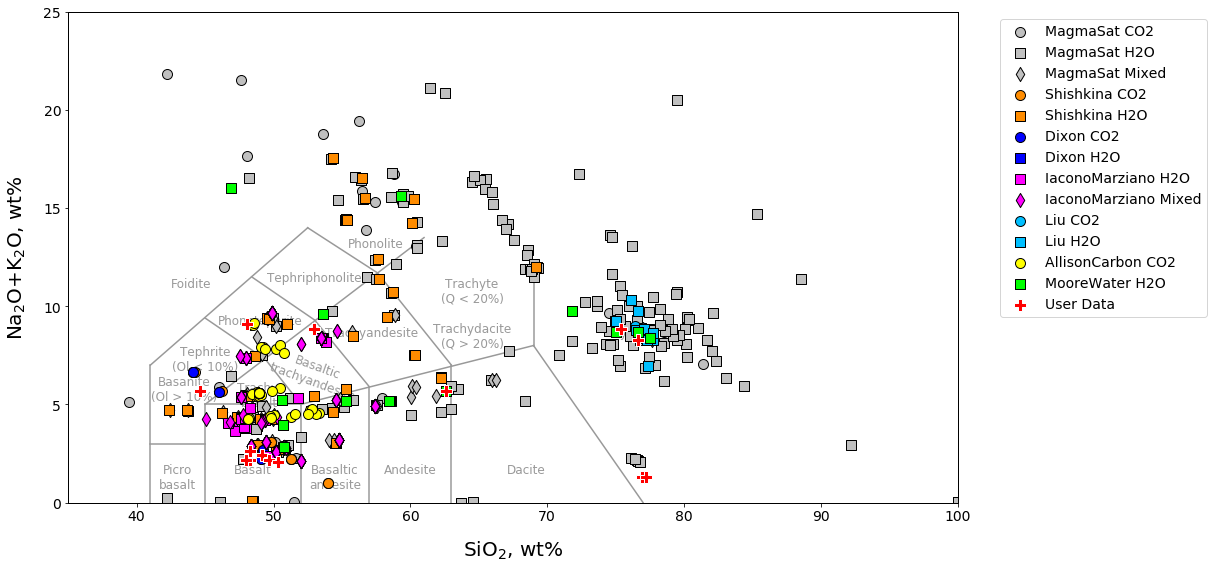

In [10]:
v.calib_plot(user_data=myfile)

Figure 5b.

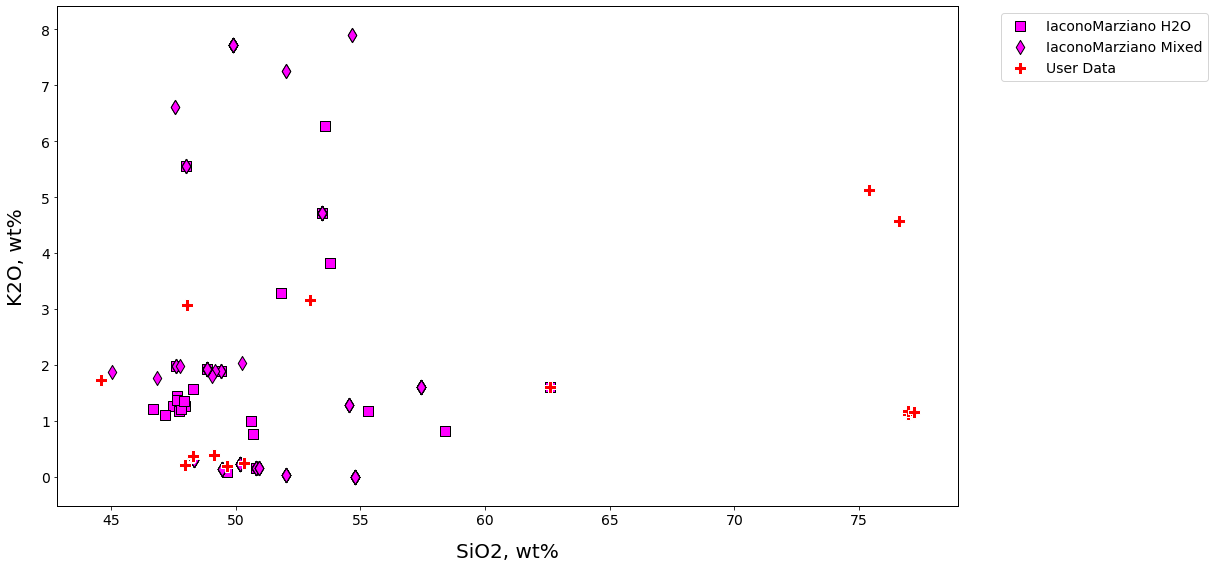

In [11]:
v.calib_plot(user_data=myfile, model='IaconoMarziano', plot_type='xy', x='SiO2', y='K2O', save_fig=False)

*Figure 5: Example calibration plots. a. The default plot with user_data defined as myfile and no other options set. This produces a TAS digram with the user data plotted atop data from calibration datasets for all models. b. A plot with all options specified. This example produces an x-y plot for user_data (myfile) and the Moore et al. (1998) calibration dataset where x and y are SiO$_2$ and K$_2$O concentration in wt%.*

Using the functionality built into python and the matplotlib library, user data can be plotted on its own at any time, including before any calculations are performed. Almost any plot type imaginable can be produced, and users should refer to the maptlotlib documentation (https://matplotlib.org/3.2.1/index.html) if more complex plotting is desired. 

## Calculating dissolved volatile concentrations
<hr style="background-color: #a2b969;height: 8.0px;"/>

The `calculate_dissolved_volatiles()` function calculates the concentration of dissolved H$_2$O and CO$_2$ in the melt at a given pressure-temperature condition and with a given H$_2$O-CO$_2$ fluid composition, defined as the mole fraction of H$_2$O in an H$_2$O-CO$_2$ fluid (XH$_2$O$^{fluid}$). The default MagmaSat model relies on the underlying functionality of MELTS, whose basic function is to calculate the equilibrium phase assemblage given the bulk composition of the system and pressure-temperature conditions. To calculate dissolved volatile concentrations thus requires computing the equilibrium state of a system at fixed pressure and temperature over a range of bulk volatile concentrations until a solution is found that satisfies the user defined fluid composition.

First, the function makes an initial guess at the appropriate bulk volatile concentrations by finding the minimum dissolved volatile concentrations in the melt at saturation, while asserting that the weight fraction of H$_2$O/(H$_2$O+CO$_2$) in the system is equal to the user input mole fraction of H$_2$O/(H$_2$O+CO$_2$) in the fluid. This is done by increasing the H$_2$O and CO$_2$ concentrations appropriately until a fluid phase is stable. Once fluid saturation is determined, the code then performs directional, iterative, and progressively more refined searches, increasing the proportion of H$_2$O or CO$_2$ in the system if the mole fraction of H$_2$O calculated in the fluid is greater than or less than that defined by the user, respectively. Four iterative searches are performed; the precision of the match between the calculated and defined XH$_2$O$^{fluid}$ increases from 0.1 in the first iteration to 0.01, 0.001, and finally to 0.0001. Thus, the calculated dissolved volatile concentrations correspond to a system with XH$_2$O$^{fluid}$ within 0.0001 of the user defined value.

For non-MagmaSat models, dissolved volatile concentrations are calculated directly from model equations.

**Method structure:**<br>
> Single sample: `calculate_dissolved_volatiles(sample, temperature, pressure, X_fluid=1, verbose=False, model='MagmaSat').result`

>ExcelFile batch process: `myfile.calculate_dissolved_volatiles(temperature, pressure, X_fluid=1, print_status=True, model='MagmaSat')`

**Standard inputs:**<br>
>`sample`, `temperature`, `pressure`, `X_fluid`, `model` (see Section 3.0.1).

**Unique optional inputs:**<br>
>`verbose`: *Only for single sample calculations.* Default value is False, in which case H$_2$O and CO$_2$ concentrations are returned. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid in mole fraction, temperature, pressure, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for batch calculations.* The default value is True, in which case the progress of the calculation will be printed to the terminal. The user may desire to see the status of the calculation, as this particular function can be quite slow, averaging between 3-5 seconds per sample.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' corresponding to the calculated dissolved H$_2$O and CO$_2$ concentrations in the melt is returned (plus additional variables 'temperature' in $^{\circ}$C, 'pressure' in bars, 'XH2O_fl', 'XCO2_fl', and 'FluidProportion_wtper' (the proportion of the fluid in the system in wt%) if `verbose` is set to True). 

>If multiple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated dissolved H$_2$O and CO$_2$ concentrations in the melt, the fluid composition in mole fraction, and the proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [12]:
"""Calculate dissolved volatiles for sample 10*"""
v.calculate_dissolved_volatiles(sample=sample_10, temperature=900.0, pressure=2000.0, 
                                X_fluid=0.5, verbose=True).result

{'temperature': 900.0,
 'pressure': 2000.0,
 'H2O_liq': 2.69352739399806,
 'CO2_liq': 0.0638439414375309,
 'XH2O_fl': 0.500092686493868,
 'XCO2_fl': 0.499907313506132,
 'FluidProportion_wt': 0.18407321260435108}

In [13]:
"""Calculate dissolved for all samples in an ExcelFile object"""
dissolved = myfile.calculate_dissolved_volatiles(temperature=900.0, pressure=2000.0, X_fluid=1, print_status=True)

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968a
Calculating sample samp. P1968b
Calculating sample samp. P1968c
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1
Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07


**Table 6. Modeled dissolved volatile concentrations**

In [14]:
dissolved

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,CO2,Press,Temp,H2O_liq_VESIcal,CO2_liq_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,X_fluid_input_VESIcal,Model,Warnings
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.002873,62.5,1299.094712,5.256561,0,900.0,2000.0,1,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.006786,128.0,1283.419991,5.417720,0,900.0,2000.0,1,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.004984,100.0,1255.153759,5.353421,0,900.0,2000.0,1,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.047900,2000.0,1200.000000,4.984021,0,900.0,2000.0,1,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.111300,2000.0,1200.000000,5.134419,0,900.0,2000.0,1,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.043700,2000.0,1200.000000,5.189068,0,900.0,2000.0,1,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,703.0,1100.000000,5.810439,0,900.0,2000.0,1,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,1865.0,1100.000000,5.810439,0,900.0,2000.0,1,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,0.000000,2985.0,1050.000000,5.810439,0,900.0,2000.0,1,MagmaSat,
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,0.007000,300.0,900.000000,6.484749,0,900.0,2000.0,1,MagmaSat,


## Calculating equilibrium fluid compositions
<hr style="background-color: #f7931f;height: 8.0px;"/>

The `calculate_equilibrium_fluid_comp()` function calculates the composition of a fluid phase in equilibrium with a given silicate melt with known pressure, temperature, and dissolved H$_2$O and CO$_2$ concentrations. The calculation is performed simply by calculating the equilibrium state of the given sample at the given conditions and determining if that melt is fluid saturated. If the melt is saturated, fluid composition and mass are reported back. If the calculation finds that the melt is not saturated at the given pressure and temperature, values of 0.0 will be returned for the H$_2$O and CO$_2$ concentrations in the fluid.

**Method structure:**<br>
>Single sample: `calculate_equilibrium_fluid_comp(sample, temperature, pressure, verbose=False, model='MagmaSat').result`

>ExcelFile batch process: `myfile.calculate_equilibrium_fluid_comp(temperature, pressure=None, print_status=False, model='MagmaSat')`

**Standard inputs:**<br>
>`sample`, `temperature`, `pressure`, `model` (see Section 3.0.1).

**Unique optional inputs:**<br>
>`verbose`: *Only for single sample calculations.* Default value is False, in which case H$_2$O and CO$_2$ concentrations in the fluid in mol fraction are returned. If set to True, additional parameters are returned in a dictionary: H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%. 

>`print_status`: *Only for batch calculations.* The default value is False. If True is passed, the progress of the calculation will be printed to the terminal.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, a dictionary with keys 'H2O' and 'CO2' is returned (plus additional variables 'FluidMass_grams' and 'FluidProportion_wtper' if `verbose` is set to True). 

>If multiple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Pressure (in bars) and Temperature (in $^{\circ}$C) columns are always returned.

In [15]:
"""Calculate fluid composition for the extracted sample"""
v.calculate_equilibrium_fluid_comp(sample=sample_10, temperature=900.0, pressure=100.0).result

{'CO2': 0.00528661429366132, 'H2O': 0.994713385706339}

Below we calculate equilibrium fluid compositions for all samples at a single temperature of 900 $^{\circ}$C and a single pressure of 1,000 bars. Note that some samples in this dataset have quite low volatile concentrations (e.g., the Tucker et al. (2019) basalts from Kilauea), and so are below saturation at this P-T condition. The fluid composition for undersaturated samples is returned as values of 0 for both H$_2$O and CO$_2$.

**Table 7. Isothermally modeled equilibrium fluid compositions**

In [16]:
"""Calculate fluid composition for all samples in an ExcelFile object"""
eqfluid = myfile.calculate_equilibrium_fluid_comp(temperature=900.0, pressure=1000.0)
eqfluid

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,H2O,CO2,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.424695,0.002873,62.5,1299.094712,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.425984,0.006786,128.0,1283.419991,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.437758,0.004984,100.0,1255.153759,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,4.500000,0.047900,2000.0,1200.000000,0.984531,0.015469,900.0,1000.0,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,5.100000,0.111300,2000.0,1200.000000,0.974997,0.025003,900.0,1000.0,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,5.200000,0.043700,2000.0,1200.000000,0.990107,0.009893,900.0,1000.0,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,2.620000,0.000000,703.0,1100.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,5.030000,0.000000,1865.0,1100.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,6.760000,0.000000,2985.0,1050.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,4.340000,0.007000,300.0,900.000000,0.977773,0.022227,900.0,1000.0,MagmaSat,


Below, we calculate equilibrium fluid compositions for the same dataset using temperatures and pressures as defined in the input data (Table 3). Note that Samples "samp. HPR3-1_XL-3" and "samp. HPR3-1_XL-4_INCL-1" have a user-defined value of 0.0 for temperature and pressure, respectively. VESIcal automatically skips the calculation of equilibrium fluids for these samples and returns a warning to the user, which are both printed to the terminal below and appended to the "Warnings" column in the returned data.

**Table 8. Modeled equilibrium fluid compositions with unique temperatures.** Warnings “Bad temperature” and “Bad pressure” indicate that no data (or 0.0 value data) was given for the temperature or pressure of that sample, in which case the calculation of that sample is skipped.

In [17]:
"""Calculate fluid composition for all samples with unique pressure and temperature values for each sample.
Pressure and temperature values are taken from columns named "Press" and "Temp" in the example ExcelFile"""

eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
eqfluid_wtemps

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Temperature for sample samp. HPR3-1_XL-3 is <=0. Skipping sample.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pressure for sample samp. HPR3-1_XL-4_INCL-1 is <=0. Skipping sample.
  after removing the cwd from sys.path.


,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,K2O,P2O5,H2O,CO2,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Model,Warnings
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.352014,0.210479,0.424695,0.002873,62.5,1299.094712,0.586164,0.413836,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.373328,0.204452,0.425984,0.006786,128.0,1283.419991,0.286160,0.713840,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.396512,0.238996,0.437758,0.004984,100.0,1255.153759,0.377439,0.622561,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.210000,0.170000,4.500000,0.047900,2000.0,1200.000000,0.892371,0.107629,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.200000,0.170000,5.100000,0.111300,2000.0,1200.000000,0.918888,0.081112,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.240000,0.230000,5.200000,0.043700,2000.0,1200.000000,0.955803,0.044197,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.610000,0.240000,2.620000,0.000000,703.0,1100.000000,1.000000,0.000000,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.610000,0.240000,5.030000,0.000000,1865.0,1100.000000,1.000000,0.000000,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.610000,0.240000,6.760000,0.000000,2985.0,1050.000000,1.000000,0.000000,MagmaSat,
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,1.133084,0.000000,4.340000,0.007000,300.0,900.000000,0.998764,0.001236,MagmaSat,


### Converting fluid composition units
The fluid composition is always returned in units of mol fraction. Two functions exist to transform only the H$_2$O-CO$_2$ fluid composition between mol fraction and wt% and can easily be applied to returned data sets from calculations. Both functions require that the user provide the dataframe containing fluid composition information plus the names of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid. The default values for column names are set to those that may be returned by VESIcal core calculations, such that they need not be specified unless the user has changed them or is supplying their own data (e.g., imported data not processed through a core calculation).

**Method structure:**<br>
>Mol fraction to wt%: `fluid_molfrac_to_wt(data, H2O_colname='XH2O_fl_VESIcal', CO2_colname='XCO2_fl_VESIcal')`

>Wt% to mol fraction: `fluid_wt_to_molfrac(data, H2O_colname='H2O_fl_wt', CO2_colname='CO2_fl_wt')`

**Required inputs:**<br>
>`data`: A pandas DataFrame containing columns for H$_2$O and CO$_2$ concentrations in the fluid.

**Optional inputs:**<br>
>`H2O_colname` and `CO2_colname`: The default values are 'XH2O_fl' and 'XCO2_fl' if input data are in mol fraction or 'H2O_fl_wt' and 'CO2_fl_wt' if the data are in wt%. Strings containing the name of the columns corresponding to the H$_2$O and CO$_2$ concentrations in the fluid.

**Calculated outputs:**<br>
>The original data passed plus newly calculated values are returned in a DataFrame.

**Table 9. Equilibrium fluid compositions converted from mol fraction to wt%**

In [18]:
"""Converting from mol fraction to wt%"""
eqfluid_wt = v.fluid_molfrac_to_wt(eqfluid)
eqfluid_wt

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,62.5,1299.094712,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,128.0,1283.419991,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,100.0,1255.153759,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,2000.0,1200.000000,0.984531,0.015469,900.0,1000.0,MagmaSat,,96.304445,3.695555
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,2000.0,1200.000000,0.974997,0.025003,900.0,1000.0,MagmaSat,,94.106168,5.893832
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,2000.0,1200.000000,0.990107,0.009893,900.0,1000.0,MagmaSat,,97.617908,2.382092
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,703.0,1100.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1865.0,1100.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,2985.0,1050.000000,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,300.0,900.000000,0.977773,0.022227,900.0,1000.0,MagmaSat,,94.740209,5.259791


**Table 10. Equilibrium fluid compositions converted from wt% to mol fraction**

In [19]:
"""Converting from wt% to mol fraction"""
eqfluid_mol = v.fluid_wt_to_molfrac(eqfluid_wt)
eqfluid_mol

,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt,XH2O_fl,XCO2_fl
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,0.984531,0.015469,900.0,1000.0,MagmaSat,,96.304445,3.695555,0.984531,0.015469
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,0.974997,0.025003,900.0,1000.0,MagmaSat,,94.106168,5.893832,0.974997,0.025003
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,0.990107,0.009893,900.0,1000.0,MagmaSat,,97.617908,2.382092,0.990107,0.009893
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,0.977773,0.022227,900.0,1000.0,MagmaSat,,94.740209,5.259791,0.977773,0.022227


## Calculating saturation pressures
<hr style="background-color: #4cc1ef;height: 8.0px;"/>

The `calculate_saturation_pressure()` function calculates the minimum pressure at which a given silicate melt with known temperature and H$_2$O and CO$_2$ concentrations would be saturated with fluid. For MagmaSat, this is calculated by finding the pressure at which the smallest amount of vapor is present. This function also calculates the composition of the vapor in equilibrium with the melt at those conditions.

The function works by calculating the equilibrium state of the given melt at very high pressure (20,000 bars) and then decreasing the pressure in steps of 1,000 bars until the mass of vapor is >0 grams. At this point, the pressure space is narrowed and searched in steps of 100 bars and then in steps of 10 bars until the saturation pressure is found. Thus, these calculations are accurate to 10 bars.

For non-MagmaSat models, saturation pressure is calculated by repeatedly calculating the dissolved volatile concentration over a range of pressures and minimizing the difference between this computed concentration and the given concentration. This is only practical for non-MagmaSat models, where the dissolved volatiles calculation is extremely fast.

**Method structure:**<br>
>Single sample: `calculate_saturation_pressure(sample, temperature, verbose=False, model='MagmaSat').result`

>ExcelFile batch process: `myfile.calculate_saturation_pressure(temperature, print_status=True, model='MagmaSat')`

**Standard inputs:**<br>
>`sample`, `temperature`, `model` (see Section 3.0.1).

**Unique optional inputs:**<br>
> `verbose`: *Only for single sample calculations.* Default value is False, in which case the saturation pressure in bars is returned. If set to True, additional parameters are returned in a dictionary: saturation pressure in bars, H$_2$O and CO$_2$ concentrations in the fluid, mass of the fluid in grams, and proportion of the fluid in the system in wt%.

> `print_status`: *Only for batch calculations.* The default value is True, in which case the progress of the calculation will be printed to the terminal.

**Calculated outputs:**<br>
>If a single sample is passed to `sample`, the saturation pressure in bars is returned as a numerical value (float) (plus additional variables 'XH2O_fl', 'XCO2_fl', 'FluidMass_grams', and 'FluidProportion_wtper' if `verbose` is set to True). 

>If multiple samples are passed as an ExcelFile object, a pandas DataFrame is returned with sample information plus calculated saturation pressures, equilibrium fluid compositions, mass of the fluid in grams, and proportion of the fluid in the system in wt%. Temperature (in $^{\circ}$C) is always returned.

In [20]:
"""Calculate the saturation pressure of the single sample we defined in Section 3.1.2 at 925 degrees C"""
v.calculate_saturation_pressure(sample=mysample, temperature=925.0, verbose=True).result

{'SaturationP_bars': 2720,
 'FluidMass_grams': 0.0016655984224872,
 'FluidProportion_wt': 0.0015635017577088073,
 'XH2O_fl': 0.825802671679744,
 'XCO2_fl': 0.174197328320256}

**Table 11. Isothermally modeled saturation pressures**

In [21]:
"""Calculate the saturation pressure for all samples in an ExcelFile object at 925 degrees C"""
satPs = myfile.calculate_saturation_pressure(temperature=925.0)
satPs

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968a
Calculating sample samp. P1968b
Calculating sample samp. P1968c
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1
Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07
Done!


,CITATION,ROCK TYPE,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,...,Press,Temp,SaturationP_bars_VESIcal,Temperature_C_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
Kil3-6_1a,Tucker et al. (2019),Basalt,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,...,62.5,1299.094712,80,925.0,0.439592,0.560408,0.000026,0.000029,MagmaSat,
Kil3-6_3a,Tucker et al. (2019),Basalt,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,...,128.0,1283.419991,140,925.0,0.248725,0.751275,0.000620,0.000696,MagmaSat,
Kil3-6_4a,Tucker et al. (2019),Basalt,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,...,100.0,1255.153759,120,925.0,0.303412,0.696588,0.000332,0.000372,MagmaSat,
10*,Roggensack (2001),Basalt,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,...,2000.0,1200.000000,2370,925.0,0.785443,0.214557,0.001277,0.001221,MagmaSat,
19*,Roggensack (2001),Basalt,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,...,2000.0,1200.000000,3430,925.0,0.685666,0.314334,0.000226,0.000215,MagmaSat,
25,Roggensack (2001),Basalt,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,...,2000.0,1200.000000,2580,925.0,0.825858,0.174142,0.000899,0.000854,MagmaSat,
SAT-M12-1,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,703.0,1100.000000,540,925.0,1.000000,0.000000,0.005197,0.005125,MagmaSat,
SAT-M12-2,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,1865.0,1100.000000,1490,925.0,1.000000,0.000000,0.015744,0.015163,MagmaSat,
SAT-M12-4,Moore et al. (1998),Andesite,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,...,2985.0,1050.000000,2340,925.0,1.000000,0.000000,0.000981,0.000929,MagmaSat,
samp. P1968a,Myers et al. (2019),Rhyolite,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,...,300.0,900.000000,1030,925.0,0.970939,0.029061,0.005539,0.005308,MagmaSat,


**Table 12. Modeled saturation pressures with unique temperatures** The warning “Bad temper- ature” indicates that no data (or 0.0 value data) was given for the temperature of that sample,
in which case the calculation of that sample is skipped.

In [22]:
"""Calculate the saturation pressure for all samples in an ExcelFile object, taking temperature
values from a column named "Temp" in the ExcelFile"""
satPs_wtemps = myfile.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps

myfile.save_excelfile('table11.xlsx', satPs_wtemps)

Calculating sample Kil3-6_1a
Calculating sample Kil3-6_3a
Calculating sample Kil3-6_4a
Calculating sample 10*
Calculating sample 19*
Calculating sample 25
Calculating sample SAT-M12-1
Calculating sample SAT-M12-2
Calculating sample SAT-M12-4
Calculating sample samp. P1968a
Calculating sample samp. P1968b
Calculating sample samp. P1968c
Calculating sample samp. HPR3-1_XL-3
Calculating sample samp. HPR3-1_XL-4_INCL-1


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Temperature for sample samp. HPR3-1_XL-3 is <=0. Skipping sample.
  This is separate from the ipykernel package so we can avoid doing imports until


Calculating sample AW-6
Calculating sample AW-46
Calculating sample KI-07
Done!
Saved table11.xlsx


## Calculating isobars and isopleths
<hr style="background-color: #ffcc4c;height: 8.0px;"/>

In this example, we demonstrate how isobars (lines of constant pressure) and isopleths (lines of constant fluid composition) can be calculated for any one composition. A single melt composition can be extracted from a loaded excel file, or a composition can be entered by hand and stored within a dictionary. Due to computational intensity, isobars and isopleths can only be computed for one sample composition at a time.

Once a single composition is defined, conditions over which to calculate isobars and isopleths must be specified. The generated plot is isothermal, so only one temperature can be chosen. Isobars and isopleths can be calculated for any number of pressures or XH$_2$O$^{fluid}$ values, respectively, passed as lists. 

The calculation is performed by iterating through possible concentrations of H$_2$O and CO$_2$ and calculating the equilibrium state for the system. The iteration begins at a fixed H$_2$O concentration, increasing the CO$_2$ concentration in steps of 0.1 wt% until a fluid phase is stable. The H$_2$O concentration is then increased by 0.5 wt% and CO$_2$ is again increased from 0 until a fluid phase is stable. This process is repeated for H$_2$O values ranging from 0–15 wt%. The H$_2$O and CO$_2$ concentrations from each system for which a fluid phase was found to be stable are saved and written to a pandas DataFrame, which is returned upon completion of the calculation.

Isobars and isopleths are computed at fixed H$_2$O-CO$_2$ points for any given pressure. To generate curves, polynomials are fit to computed points using numpy's polyfit method. This can be optionally disabled by setting `smooth_isobars` or `smooth_isopleths` to False. The curvature of the isobars depends strongly on the number of points used to fit a polynomial, deemed "control points", with curve fits becoming more accurate to the model as the number of control points increases. We found that above five control points, changes to the shape of the curve fits becomes negligible. Thus, as a compromise between accuracy and computation time, and to maintain consistency, MagmaSat isobars are always computed with 5 control points at XH$_2$O$^{fluid}$ values of 0, 0.25, 0.5, 0.75, and 1. Because non-MagmaSat models compute extremely quickly, all non-MagmaSat models use 51 control points per isobar.

**Method structure:**<br>
>*Only single sample calculations.* `calculate_isobars_and_isopleths(sample, temperature, pressure_list, isopleth_list=None, smooth_isobars=True, smooth_isopleths=True, print_status=True, model="MagmaSat").result`

**Standard inputs:**<br>
>`sample`, `temperature`, `model` (see Section 3.0.1).

**Unique required inputs:**<br>
>`pressure_list`: A list of all pressures in bars at which to calculate isobars. If only one value is passed it can be as float instead of list.

**Unique optional inputs:**<br>
>`isopleth_list`: The default value is None in which case only isobars will be calculated. A list of all fluid composition values, in mole fraction H$_2$O (XH$_2$O$^{fluid}$), at which to calculate isopleths. Values can range from 0–1. If only one value is passed it can be as float instead of list. N.b. that, due to the method of isobar smoothing using control points as outlined above, each isopleth value passed here not equal to one of the five standard control point values (0, 0.25, 0.5, 0.75, or 1) will result in an an additional control point being used to smooth the isobars. Thus, entering additional isopleth values results not only in more isopleth outputs but also in ``smoother'' (i.e., more well constrained) isobars.

>`smooth_isobars` and `smooth_isopleths`: The default value for both of these arguments is True, in which case polynomials will be fit to the computed data points.

>`print_status`: The default value is True. If True, the progress of the calculations will be printed to the terminal.

**Calculated outputs:** 
>The function returns two pandas DataFrames: the first has isobar data, and the second has isopleth data. Columns in the isobar dataframe are 'Pressure', 'H2Omelt', and 'CO2melt', corresponding to pressure in bars and dissolved H$_2$O and CO$_2$ in the melt in wt%. Columns in the isopleth dataframe are 'XH2O_fl', 'H2O_liq', and 'CO2_liq', corresponding to XH$_2$O$^{fluid}$ and dissolved H$_2$O and CO$_2$ in the melt in wt%.

In [23]:
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1200.0

"""Define a list of pressures in bars:"""
pressures = [1000.0, 2000.0, 3000.0]

Next, the H$_2$O and CO$_2$ dissolved in the melt at saturation is calculated at the specified temperature and over the range of specified pressures. Note that, because this function calculates two things (isobars and isopleths), two variable names must be given (below, "isobars, isopleths"). This calculation can be quite slow, and so it is recommended to set print_status to True.

In [24]:
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=sample_10, 
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25,0.5,0.75]).result

Calculating isobar at 1000.0 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 2000.0 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 3000.0 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!


## Calculating degassing paths
<hr style="background-color: #c13017;height: 8.0px;"/>

A degassing path is a series of volatile concentrations both in the melt and fluid that a magma will follow during decompression. In the calculation, the saturation pressure is computed, and then the system is equilibrated along a trajectory of decreasing pressure values at steps of 100 bars (or 10 bars if the starting pressure is <500 bars). If so desired, this calculation can be performed for any initial pressure, but the default is the saturation pressure. If a pressure is specified that is above the saturation pressure, the calculation will simply proceed from the saturation pressure, since the magma cannot degas until it reaches saturation. 

Completely open-system, completely closed-system or partially open-system degassing paths can be calculated by specifying what proportion of the fluid to fractionate. The fluid fractionation value can range between 0 (closed-system: no fluid is removed, all is retained at each pressure step) and 1 (open-system: all fluid is removed, none is retained at each pressure step). Closed and partially open-system runs allow the user to specify the initial presence of exsolved fluid that is in equilibrium with the melt at the starting pressure.

**Method structure:**<br>
>*Only single-sample calculations.* `calculate_degassing_path(sample, temperature, pressure="saturation", fractionate_vapor=0.0, init_vapor=0.0, model="MagmaSat").result`

**Standard inputs:**<br>
>`sample`, `temperature`, `model` (see Section 3.0.1).

**Unique optional inputs:**<br>
>`pressure`: The pressure at which to begin the degassing calculations, in bars. Default value is 'saturation', which runs the calculation with the initial pressure at the saturation pressure. If a pressure greater than the saturation pressure is input, the calculation will start at saturation, since this is the first pressure at which any degassing will occur.

>`fractionate_vapor`: Proportion of vapor removed at each pressure step. Default value is 0.0 (completely closed-system degassing). Specifies the type of calculation performed, either closed system (0.0) or open system (1.0) degassing. If any value between <1.0 is chosen, user can also specify the 'init_vapor' argument (see below). A value in between 0 and 1 will remove that proportion of vapor at each step. For example, for a value of 0.2, the calculation will remove 20% of the vapor and retain 80% of the vapor at each pressure step.

>`init_vapor`: Default value is 0.0. Specifies the amount of vapor (in wt%) coexisting with the melt before degassing.

**Calculated outputs:** 
>The function returns a pandas DataFrame with columns as: 'Pressure_bars', 'H2O_liq' and 'CO2_liq' (the concentration of H$_2$O and CO$_2$ in the melt, in wt%), 'XH2O_fl' and 'XCO2_fl' (the composition of the H$_2$O-CO$_2$ fluid, in mol fraction), and 'FluidProportion_wt' (the proportion of fluid in the fluid-melt system, in wt%).

In [25]:
temp = 1200 #temperature in °C

"""Calculate open, closed, and closed + 2 wt% initial vapor"""
closed_df = v.calculate_degassing_path(sample=sample_10, temperature=temp).result
open_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, fractionate_vapor=1.0).result
half_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, fractionate_vapor=0.5).result
exsolved_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, init_vapor=2.0).result

In [26]:
"""Calculate closed-system degassing starting from a pressure of 2000 bars"""
start2000_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, pressure=2000.0).result

## Plotting

After calculating isobars, isopleths, and degassing paths, any or all of these may be plotted in an H$_2$O versus CO$_2$ plot with one simple function call. The plot will be printed directly in the notebook or, if the code is run as script in a command line, the plot will appear it its own window, at which point it can be saved as an image file. VESIcal's `plot` function takes in lists of pandas DataFrames with calculated isobar, isopleth, and degassing path information (e.g., output from `calculate_isobars_and_isopleths or calculate_degassing_path()`) and plots data as isobars (lines of constant pressure), isopleths (lines of constant fluid composition), and degassing paths (lines indicating the concentrations of H$_2$O and CO$_2$ in a melt equilibrated along a path of decreasing pressure).

Labels can be assigned to isobars, isopleths, and/or degassing paths separately. Any or all of these data can be passed to the `plot` function. Multiple sets of plottable data can be passed. For example, isobars calculated with two different models can be passed to the `isobars` argument as a list.

VESIcal's plotting function is entirely based on python's matplotlib library, which comes standard with many installations of python. With matplotlib, users can create an almost immeasurable variety of plots (note that direct matplotlib functionality is used to create custom plots in several of this manuscript's supplementary Jupyter notebooks), and users should refer to the maptlotlib documentation (https://matplotlib.org/3.2.1/index.html) if more complex plotting is desired. If preferred, VESIcal outputs can be saved to an excel file (see Section 3.10), and plotting can be done in any plotting program desired (e.g., MS Excel).

**Method structure:**<br>
>`plot(isobars=None, isopleths=None, degassing_paths=None, custom_H2O=None, custom_CO2=None,
		 isobar_labels=None, isopleth_labels=None, degassing_path_labels=None, custom_labels=None,
		 custom_colors="VESIcal", custom_symbols=None, markersize=10,
		 extend_isobars_to_zero=True, smooth_isobars=False, smooth_isopleths=False)`

**Optional inputs:**<br>
>`isobars`: DataFrame object containing isobar information as calculated by `calculate_isobars_and_isopleths()`. Or a list
of DataFrame objects.

>`isopleths`: DataFrame object containing isopleth information as calculated by `calculate_isobars_and_isopleths()`. Or a list of DataFrame objects.

>`degassing_paths`: List of DataFrames with degassing information as generated by `calculate_degassing_path()`.

>`custom_H2O`: List of groups of H$_2$O concentration values to plot as points. For example `myfile.data['H2O']` is one group of H$_2$O values. Must be passed with `custom_CO2` and must be same length as `custom_CO2`.

>`custom_CO2`: List of groups of CO$_2$ values to plot as points.For example `myfile.data['CO2']` is one group of CO$_2$ values. Must be passed with `custom_H2O` and must be same length as `custom_H2O`.

>`isobar_labels`: Labels for the plot legend. Default is None, in which case each plotted line will be given the generic legend name of "Isobars n", with n referring to the nth isobars passed. Isobar pressure is given in parentheses. The user can pass their own labels as a list of strings. If more than one set of isobars is passed, the labels should refer to each set of isobars, not each pressure. 

>`isopleth_labels`: Labels for the plot legend. Default is None, in which case each plotted isopleth will be given the generic legend name of "Isopleth n", with n referring to the nth isopleths passed. Isopleth XH$_2$O values are given in parentheses. The user can pass their own labels as a list of strings. If more than one set of isopleths is passed,  the labels should refer to each set of isopleths, not each XH$_2$O value.

>`degassing_path_labels`: Labels for the plot legend. Default is None, in which case each plotted line will be given the generic legend name of "Pathn", with n referring to the nth degassing path passed. The user can pass their own labels as a list of strings.

>`custom_labels`: Labels for the plot legend. Default is None, in which case each group of custom points will be given the generic legend name of "Customn", with n referring to the nth degassing path passed. The user can pass their own labels as a list of strings.

>`custom_colors` and `custom_symbols`: Custom colors and symbol shapes can be specified for (`custom_H2O`, `custom_CO2`) points. A list of color values or symbol types readable by Matplotlib (see Matplotlib documentation) can be entered. The length of this list must be equal to the lengths of `custom_H2O` and `custom_CO2`. If nothing is specified for custom_colors, VESIcal's default colors will be used. If nothing is specified for `custom_symbols`, all points will be plotted as filled circles.

>`markersize`: The size of the symbols can be specified here. If not specified, the default value is marker size 10.

**Advanced inputs:** Most users will not need to use these inputs.<br>
>`extend_isobars_to_zero`: If set to True (the default), isobars will be extended to the plot axes, which are at x=0 and y=0, even if there is a finite solubility at zero partial pressure.

>`smooth_isobars` and `smooth_isopleths`: If set to True, isobar or isopleth data will be fit to a polynomial and plotted. If set to False (the default), the raw input data will be plotted. Note that MagmaSat `calculate_isobars_and_isopleths()` calculations return already "smoothed" data (that is, the raw data are fit to polynomials before being returned). Raw "unsmoothed" data can be returned by MagmaSat `calculate_isobars_and_isopleths()` (see documentation on this method).

**Calculated outputs:** 
>The function returns a plot with x-axis as H$_2$O wt% in the melt and y-axis as CO$_2$ wt% in the melt. Isobars, or lines of constant pressure at which the sample magma composition is saturated, and isopleths, or lines of constant fluid composition at which the sample magma composition is saturated, are plotted if passed. Degassing paths, or the concentration of dissolved H$_2$O and CO$_2$ in a melt equilibrated along a path of decreasing pressure, is plotted if passed.

### A simple example: Isobars and isopleths
**Figure 6**

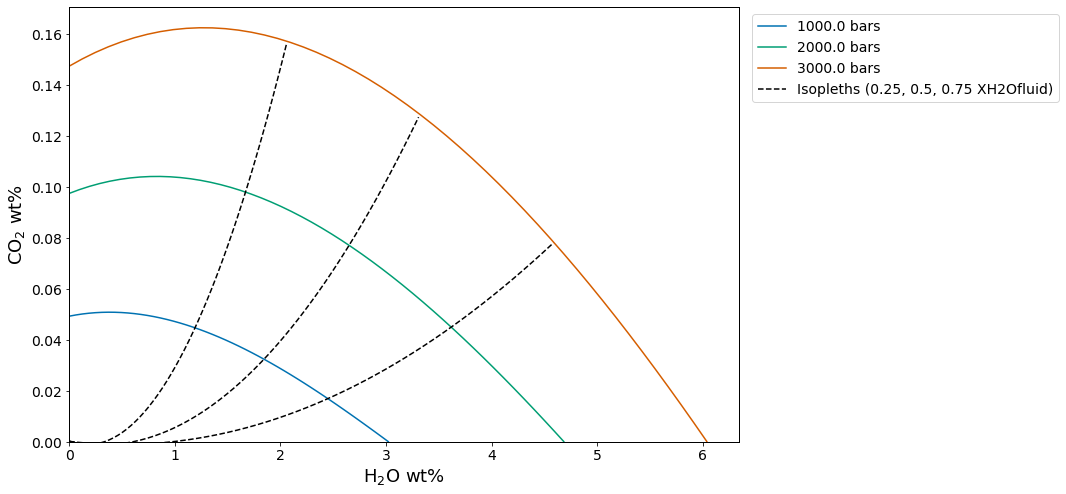

In [27]:
v.plot(isobars=isobars, isopleths=isopleths)

*Figure 6 - Isobars and isopleths calculated for the sample, temperature, pressures, XH$_2$O$^{fluid}$ values, and with the model as defined in Section 3.6. Manuscript default values are sample* `10*` *at a 1,200 $^{\circ}$C with isobars at 1,000, 2,000, and 3,000 bars, isopleths at XH$_2$O$^{fluid}$ = 0, 0.25, 0.5, 0.75, and 1 calculated with MagmaSat*

When plotting isobars and isopleths via MagmaSat, the values calculated by `calculate_isobars_and_isopleths()` are used to calculate polynomial fits using Numpy's `polyfit`. These polynomial fits, not the raw calculated data, are what have been plotted above. This method of fitting polynomial curves to these data is common in the literature  (e.g., Newman & Lowenstern, 2002; IaconoMarziano et al., 2012; Iacovino et al., 2013) and is likely a very close approximation of the true saturation surface. Non-MagmaSat models do not calculate polynomial fits by default, but this can be done by passing `smooth_isobars=True` and `smooth_isopleths=True` to `plot()`.

A user may wish to apply custom formatting to the plot, in which case the polynomial fits can be calculated and returned as a pandas DataFrame, which the user can then plot up manually using Matplotlib, excel, or some other preferred method. To calculate polynomial fits to isobar and isopleth data, isobars and isopleths can be passed to `smooth_isobars_and_isopleths()`. For this advanced case, we refer the reader to the documentation.

### A simple example: Degassing paths

**Figure 7**

Figure 7a

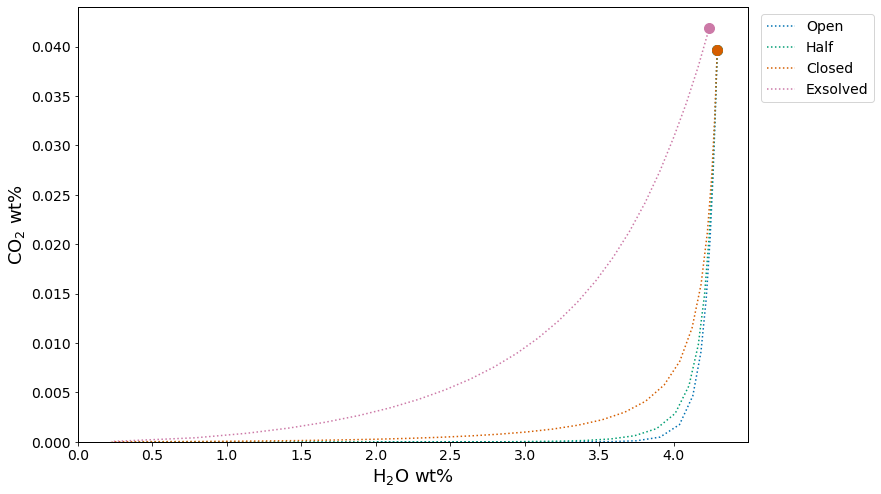

In [28]:
v.plot(degassing_paths=[open_df, half_df, closed_df, exsolved_df],
       degassing_path_labels=["Open", "Half", "Closed", "Exsolved"])

Figure 7b

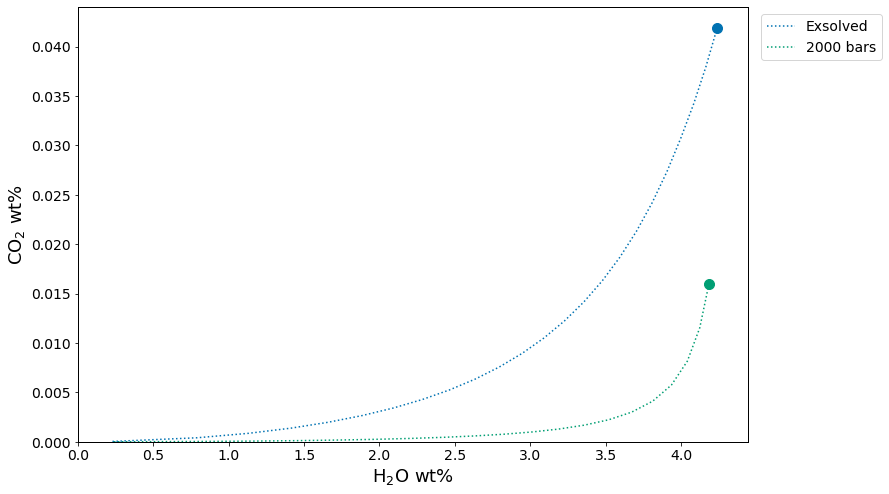

In [29]:
v.plot(degassing_paths=[exsolved_df, start2000_df],
       degassing_path_labels=["Exsolved", "2000 bars"])

*Figure 7 - Degassing paths calculated for the sample, temperature, degassing style, initial exsolved fluid wt%, starting pressure, and model as designated in Section 3.6. Default manuscript values are sample* `10*` *at 1,200 °C. "Open", "Half", and "Closed" curves in (a) represent open-system, partially open-system (50% fractionated fluid), and closed-system degassing paths, respectively, starting at the saturation pressure. The "Exsolved" curve in (b) represents closed-system degassing with an initial exsolved fluid wt% = 2.0. The "2000" curve in (b) represents closed-system degassing calculated starting at a pressure of 2,000 bars.*

### Plotting multiple calculations

One of the major advantages to VESIcal over any other model is the ability to quickly calculate and plot multiple calculations. VESIcal's `plot()` function is very powerful and is designed to work with any VESIcal generated data. It can automatically plot and label one or multiple calculations. In addition, it can plot, as a scatter plot, any x-y points. The plot function always generates plots with H$_2$O on the x-axis and CO$_2$ on the y-axis. Functionality to plot other data (e.g. Harker style diagrams) is already possible with Matplotlib, and so VESIcal does not duplicate this functionality.

It may be tempting to plot multiple calculations on multiple samples and compare them, however we strongly caution against plotting data that do not correspond. For example, isobars and isopleths are calculated isothermally. If degassing paths are also plotted, the user should ensure that the degassing paths were calculated at the same temperature as the isobars and isopleths. 

#### Isobars, isopleths, and degassing paths

In this example we will use data imported in Section 3.1 and calculations performed in Sections 3.5 and 3.6. Of course, all of the data calculated with VESIcal can be exported to an Excel file for manipulation and plotting as desired. However, some examples of plotting that can be done within this notebook or in a python script are shown below. Here we plot:
- Isobars calculated at 1200 $^{\circ}$C and pressures of 1,000, 2,000, and 3,000 bars for sample 10*
- Isopleths calculated at 1200 $^{\circ}$C and XH$_2$O$^{fluid}$ values of 0, 0.25, 0.5, 0.75, and 1 for sample 10*
- An open-system degassing path for sample 10*
- A closed-system degassing path for sample 10*

**Figure 8**

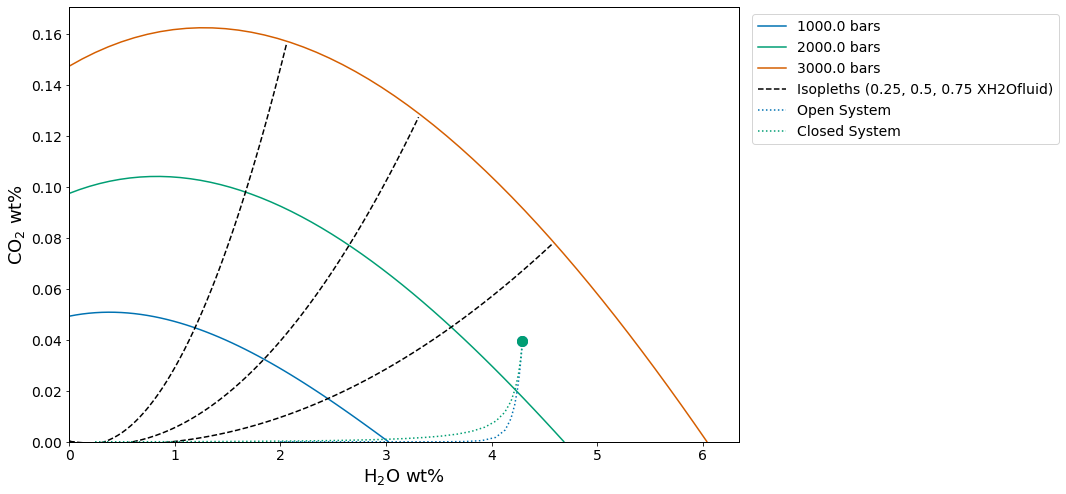

In [30]:
v.plot(isobars=isobars, 
       isopleths=isopleths, 
       degassing_paths=[open_df, closed_df], 
       degassing_path_labels=["Open System", "Closed System"])

*Figure 8 - Example of plotting multiple calculations on one plot. Isobars and isopleths as defined in Section 3.6 and shown in Section 3.8.1 and degassing curves as defined in Section 3.7 and shown in Section 3.8.2. Default manuscript values are for sample* `10*` *at 1,200 °C with isobars at 1,000, 2,000, and 3,000 bars, isopleths at XH$_2$O$^{fluid}$ values of 0, 0.25, 0.5, 0.75, and 1 with an open-system and a closed-system degassing path.*

#### Isobars, isopleths, and degassing paths for multiple samples

First, we will calculate some new data for two different samples: a basanite (sample KI-07 from Iacovino et al., 2016) and a rhyolite (sample samp. P1968a from Myers et al., 2019). For both samples we will calculate and then plot:
- Isobars and isopleths at 1100 $^{\circ}$C, pressures of 1,000 and 2,000 bars and fluid compositions of XH$_2$O$^{fluid}$ of 0.25, 0.5, and 0.75
- Closed-system degassing paths at 1100 $^{\circ}$C

In [31]:
basanite_sample = myfile.get_sample_oxide_comp('KI-07')
rhyolite_sample = myfile.get_sample_oxide_comp('samp. P1968a')

basanite_isobars, basanite_isopleths = v.calculate_isobars_and_isopleths(sample=basanite_sample,
                                                                         temperature=1100,
                                                                         pressure_list=[1000, 2000],
                                                                         isopleth_list=[0.25,0.75]).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite_sample, 
                                                                         temperature=1100, 
                                                                         pressure_list=[1000, 2000],
                                                                         isopleth_list=[0.25,0.75]).result

basanite_degassing_path = v.calculate_degassing_path(sample=basanite_sample,
                                                     temperature=1100).result

rhyolite_degassing_path = v.calculate_degassing_path(sample=rhyolite_sample,
                                                    temperature=1100).result

Calculating isobar at 1000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isobar control point at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 2000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isobar control point at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!
Calculating isobar at 1000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isobar control point at XH2Ofluid = 0.5
Calculating isopleth at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 2000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isopleth at XH2Ofluid = 0.25
Calculating isobar control point at XH2Ofluid = 0.5
Calculating isopleth 

**Figure 9**

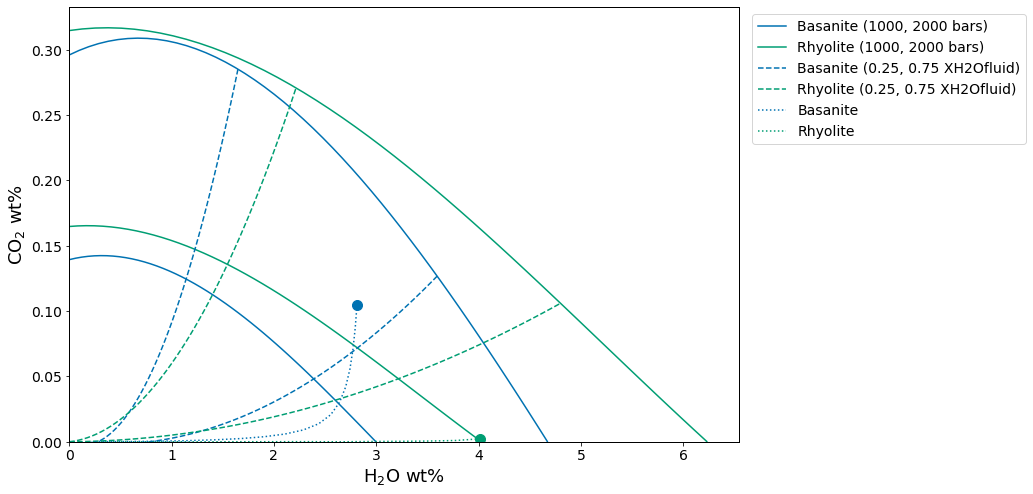

In [32]:
v.plot(isobars=[basanite_isobars, rhyolite_isobars],
      isopleths=[basanite_isopleths, rhyolite_isopleths],
      degassing_paths=[basanite_degassing_path, rhyolite_degassing_path],
      isobar_labels=["Basanite", "Rhyolite"],
      isopleth_labels=["Basanite", "Rhyolite"],
      degassing_path_labels=["Basanite", "Rhyolite"])

*Figure 9 - Example of plotting multiple calculations from multiple samples on the same plot. Note that the colors are automatically set to correspond to each sample for all plotted items (here, isobars, isopleths, and degassing paths). Samples, pressures, temperatures, XH$_2$O$^{fluid}$ values, and degassing path styles are defined above in this section. Manuscript default values are for a basanite (sample* `KI-07` *) and a rhyolite (sample* `samp. P1968a` *) at 1,100 °C, 1,000 and 2,000 bars, and XH$_2$O$^{fluid}$ = 0.25 and 0.75 and closed-system degassing.*

## Model hybridization (Advanced)

One of the advantages of implementing the solubility models in a generic python module is the flexibility this affords the user in changing the way solubility models are defined and used. In particular, the structure allows any combination of pure-fluid models to be used together in modeling mixed-fluids, and fugacity or activity models can be quickly changed without modifying code. This allows advanced users to see how changing a fugacity or activity model implemented in any particular solubility model would affect model results. Instructions for hybridizing models can be found in Supplemental Jupyter notebook S2.

## Exporting data

Once batch calculations have been performed, they can be exported to an Excel file with the `save_excelfile()` command. This operation requires that the user define a filename (what to name your new file) and a list of the calculation results to save to this file. 

Note that this requires that calculations have been assigned to variable names, which has been done in all of the given examples. For example, to calculate saturation pressures of an imported file saved to the variable 'myfile' and simply print the output, the user can type `myfile.calculate_saturation_pressures([options])`, where '[options]' are the required and optional inputs. However, to save this result to a variable (e.g., called 'my_satPs') so that it can be accessed later, the correct python syntax would be `my_satPs = myfile.calculate_saturation_pressures([options])`.

Multiple calculations can be saved to one Excel file, with each calculation being saved as its own sheet. If desired, the user can define the names of each of these sheets. If not specified, the sheets will be named 'Original_User_Data', which contains the original input data, and then 'CalcN' where N is the nth calculation in a list of calculations.

Advanced users note that any pandas DataFrame can be passed as a calculation, meaning this functionality is not limited to VESIcal's prescribed outputs. The `save_excelfile()` method uses the pandas `to_excel` method, however not all options are implemented here.

**Method structure:**<br>
>`save_excelfile(self, filename, calculations, sheet_name=None)`

**Required inputs:**<br>
>`filename`: Name of the file to create. The extension (.xlsx) should be included along with the name itself, all in quotes (e.g., `filename='myfile.xlsx'`).

>`calculations`: A list of variables containing calculated outputs from any of the core ExcelFile functions: `calculate_dissolved_volatiles()`, `calculate_equilibrium_fluid_comp()`, and `calculate_saturation_pressure()`. This must be passed as a list type variable, even if only one calculation is given. This is done by enclosing the variable in square brackets (e.g., `calculations=[my_calculation]`).

**Optional inputs:**<br>
>`sheet_name`: The default value is None, in which case sheets will be saved as 'Original_User_data' (the data input by the user) followed by 'CalcN' where N is the nth calculation in `calculations`. Otherwise, a list of names for the sheets can be passed, with the names in quotes (e.g. `sheet_name=['SaturationPressures'])`. 'Original_User_data' will always be saved as the first sheet.

**Calculated outputs:** 
>An Excel file will be saved to the active directory (i.e., the same folder as this manuscript notebook or wherever the code is being used).

Here we save five of the calculations performed earlier in this manuscript that were performed on imported user data. The user data was saved to the variable 'myfile'. Note that we execute the save command on the myfile variable. This is necessary such that the original input user data may also be output with the results.

In [33]:
myfile.save_excelfile(filename='testsave.xlsx', 
                      calculations=[dissolved, eqfluid, eqfluid_wtemps, satPs, satPs_wtemps],
                      sheet_name=['dissolved', 'eqfluid', 'eqfluid_wtemps', 'SaturationPs', 'SatPs_wtemps'])

Saved testsave.xlsx


### Saving data for re-import into VESIcal

In many cases, it may be preferable to compute large amounts of data using VESIcal and then reimport them, either to preform more analysis or to plot the data. Likewise, a user may wish to compute data in VESIcal and then send the results to a colleague, who can then re-import that data into VESIcal directly. For this case, we suggest using python's pickle package (https://wiki.python.org/moin/UsingPickle). Any python object, such as the results of a VESIcal calculation, can be "pickled" or saved as a python-readable file. To use pickle, users must first import the pickle module, then "dump" the desired contents to a pickle file. The pickled data can be accessed by "loading" the pickled file.

Below we pickle our computed dissolved volatile concentrations by dumping our variable `dissolved` to a pickle file that we name "dissolved.p". 

In [34]:
import pickle

pickle.dump(dissolved, open("dissolved.p", "wb"))

In another python file or terminal session, `dissolved` can be loaded back in via:

In [35]:
import pickle

dissolved = pickle.load(open("dissolved.p", "rb"))

# Discussion and Conclusion


## Model Comparisons

One of the possible workflows enabled through VESIcal is the ability to easily compute and compare (numerically and graphically) results from several models at once. To illustrate this point, we will take two single samples within the calibrated compositional range of several models, calculate isobars at multiple pressures, and plot the results. This is a common way to compare the solubility surface computed by different models for a single melt composition, and it is particularly useful since it quickly highlights the significant variation that exists between published models. The results of this exercise are shown here, and a Jupyter notebook to reproduce the code and calibration checks is available in the Supplement (Supplementary Jupyter Notebook Sx).

We use a fictitious alkali basalt that we name “alkbasalt” and a fictitious rhyolite whose compositions are given in Table 13. The use of VESIcal’s `calib_plot()` function (see supplement) illustrates that the composition of the alkali basalt is within the compositional calibration ranges of four mixed-fluid solubility models: MagmaSat, Iacono-Marziano, Dixon, and Shishkina. The rhyolite is within the ranges of MagmaSat and Liu. Isobars were calculated with these models at 1200 °C for alkbasalt and 800 °C for rhyolite and pressures of 500, 1,000,  and 2,000 bars, using the below code:

**Table 13. Melt compositions used for modeling**

In [36]:
model_comps = v.ExcelFile("tables/Table_Model_Comps.xlsx")
model_comps.data

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Cr2O3,NiO,CoO
Alkali Basalt,49.00,1.27,19.7,3.74,5.33,0.17,4.82,8.85,4.23,1.00,0.37,4.51,0.25,0.0,0.0,0.0
Rhyolite,77.19,0.06,12.8,0.00,0.94,0.00,0.03,0.53,3.98,4.65,0.00,0.26,0.05,0.0,0.0,0.0


In [37]:
alkbasalt = model_comps.get_sample_oxide_comp("Alkali Basalt")
rhyolite = model_comps.get_sample_oxide_comp("Rhyolite")

alkbasalt_isobars, alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                           temperature=1200, pressure_list=[500, 1000, 2000], 
                                                                           isopleth_list=[0.5], 
                                                                           print_status=True).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, 
                                                                         temperature=800, 
                                                                         pressure_list=[500, 1000, 2000], 
                                                                         isopleth_list=[0.5]).result

Iac_alkbasalt_isobars, Iac_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                   temperature=1200, 
                                                                                   pressure_list=[500, 1000, 2000], 
                                                                                   isopleth_list=[0.5], 
                                                                                   model="IaconoMarziano").result

Dixon_alkbasalt_isobars, Dixon_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                       temperature=1200, 
                                                                                       pressure_list=[500, 1000, 2000], 
                                                                                       isopleth_list=[0.5], 
                                                                                       model="Dixon").result

Shish_alkbasalt_isobars, Shish_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                       temperature=1200, 
                                                                                       pressure_list=[500, 1000, 2000], 
                                                                                       isopleth_list=[0.5], 
                                                                                       model="Shishkina").result

Liu_rhyolite_isobars, Liu_rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, 
                                                                                 temperature=800, 
                                                                                 pressure_list=[500, 1000, 2000], 
                                                                                 isopleth_list=[0.5], 
                                                                                 model="Liu").result

Calculating isobar at 500 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 1000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Calculating isobar at 2000 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2Ofluid = 0.5
Calculating isobar control point at XH2Ofluid = 0.75
Calculating isobar control point at XH2Ofluid = 1
Done!
Calculating isobar at 500 bars
Calculating isobar control point at XH2Ofluid = 0
Calculating isobar control point at XH2Ofluid = 0.25
Calculating isopleth at XH2

../VESIcal.py:1740: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, 
  w.warn(self.calib_check,RuntimeWarning)


**Figure 10**

Figure 10a

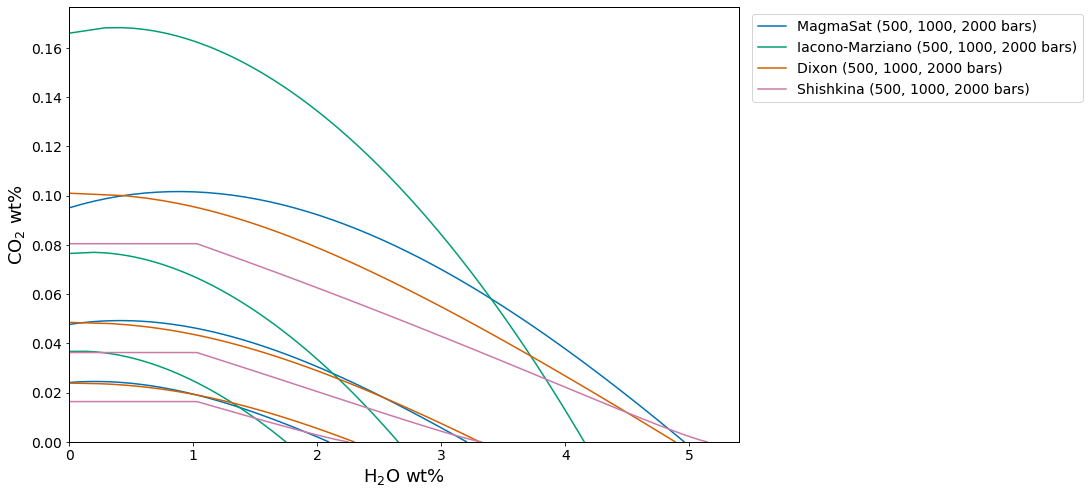

In [38]:
v.plot(isobars=[alkbasalt_isobars, Iac_alkbasalt_isobars, Dixon_alkbasalt_isobars, Shish_alkbasalt_isobars], isobar_labels=["MagmaSat", "Iacono-Marziano", "Dixon", "Shishkina"])

Figure 10b

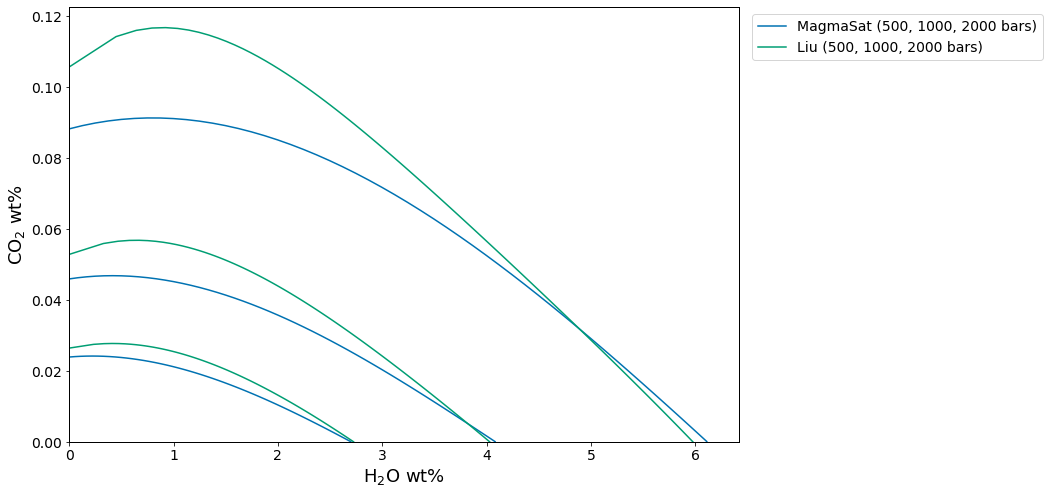

In [39]:
v.plot(isobars=[rhyolite_isobars, Liu_rhyolite_isobars], isobar_labels=["MagmaSat", "Liu"])

*Figure 10: Isobars plotted for an alkali basalt (a) and rhyolite (b) with VESIcal for five mixed-fluid solubility models. For alkali basalt, MagmaSat, Iacono-Marziano, Dixon, and Shishkina were used to create isobars at 1,200 °C. For rhyolite, MagmaSat and Liu were used to create isobars at 800 °C.*

It is immediately clear from Fig. 10 that major disagreement exists between these models. For the alkali basalt, MagmaSat and Dixon show the best agreement, particularly at pressures <2000 bars. However, the mismatch between these models (and, indeed, between all models) increases with pressure. The Iacono-Marziano model is calibrated for highly depolymerized alkali basalts resulting in an increased capacity of the melt to dissolve CO$_3$. That may explain why this model predicts significantly higher CO$_2$ solubilities at XH$_2$O$^{fluid}$ values approaching 0.

The Shishkina model displays nearly linear isobars, with finite solubility below ~1 wt% dissolved H$_2$O. This is a consequence of the model calibration; the pure-H$_2$O solubility expression of Shishkina is not calibrated with any experiments at low PH$_2$O. This results in a finite solubility at low dissolved H$_2$O concentrations, such that the zero solubility (i.e. at 1 bar) is not zero. This produces significant model error at low but non-zero values of XH$_2$O$^{fluid}$. Thus, we caution the user against using the Shishkina model at low XH$_2$O$^{fluid}$ or when fluids deviate far from pure H$_2$O or pure CO$_2$. This is discussed in more detail in Wieser et al (in prep).

The models of MagmaSat and Liu show a similar level of disagreement for H$_2$O-CO$_2$ solubility in the rhyolite, with Liu predicting much higher dissolved CO$_2$ concentrations at low XH$_2$O$^{fluid}$ (<20 relative% or ~220 ppm at XH$_2$O$^{fluid}$=0.1).

## Future development
VESIcal represents the first comprehensive volatile solubility modeling tool of its kind, including the feature that VESIcal is extensible. VESIcal is written so that implementing new or yet-to-be-implemented solubility models is as simple as possible. To implement a new model, python code describing the model equations needs to be written, and this model name needs to be added to a list of model names within the code. To make this as simple as possible such that the original authors of VESIcal are not the only people who can develop the code, planned future work includes the creation of detailed instructions (including instructional videos) illustrating this process. 

Likewise, new features can be added at any time, and enthusiastic members of the community who wish to help bring such features to VESIcal are very welcome. Users can contribute to VESIcal’s code, implementing new models and new features, via github (https://github.com/kaylai/VESIcal). The repository is public, but we encourage users who wish to contribute to the code to fork the repository into their private workspace on github. Once edits to the code are complete, the new code can be added to VESIcal by creating a “Pull Request” inside of github. Changes and enhancements to VESIcal will correspond to a change in the code’s version number. The published version of the code documented in this manuscript and archived on Zenodo is version 0.1.1 (DOI: 10.5281/zenodo.4096463). Planned features not implemented in this release include: 1. Models to calculate sample oxygen fugacity from Fe$^{2+}$/ΣFe and vice versa; 2. Additional volatiles such as sulfur; 3. More thermodynamic solubility models such as that of Papale et al. (2006).

## How to cite VESIcal and its models
To cite computations done using VESIcal, please cite this manuscript, the VESIcal version number, as well as the model(s) used. For example: "Calculations were performed using VESIcal (v. 1.0.0; Iacovino et al., 2020) with the models of Shishkina et al. (2014) and Dixon (1997; "VolatileCalc")." The web-app always runs on the most up-to-date version of the VESIcal code, but it is best practice to note if the web-app was used ("Calculations were perforumed using the VESIcal web-app (v. 1.0.0; Iacovino et al., 2020)..."). We also encourage users to be as explicit as possible as to the conditions used for modelling. This includes stating the pressure, temperature, volatile concentration, and bulk magma composition used in modelling. In the best case, VESIcal users will provide their code (e.g., as a jupyter notebook or .py file) along with their publication such that it can be easily replicated.

# Conclusions
VESIcal is a thermodynamic mixed-volatile solubility engine designed to meet the growing computational needs of the igneous petrology community. Seven commonly used volatile solubility models are built into VESIcal, which employs the most diversely calibrated (chemically and in P-T space) of the group, MagmaSat (Ghiorso and Gualda, 2015), as the default model. VESIcal can perform five core calculations with any mixed-fluid model and three core calculations with any model (mixed-fluid, CO$_2$-only, H$_2$O-only). VESIcal allows for automatic calculation of large datasets and robust built-in plotting capability.

VESIcal represents the first stone on a path toward creating a generalized thermodynamic framework to model whole scale magmatic processes. Such a framework builds upon the key tenets of VESIcal; namely: fundamental thermodynamic underpinning; inclusion of existing modeling strategies; python powered, open-source, and extensible code base; high usability at all levels; benchmarking and testing; and power as a responsive and predictive tool.


# Acknowledgements
KI and GMM were supported by the NASA Jacobs JETS Contract #NNJ13HA01C. The authors would also like to thank Mark Ghiorso, Aaron Wolf, and the ENKI team for pushing thermodynamic modeling into the future and for making this publication possible; Chelsea Allison and Giada Iacono-Marziano for discussions on their published models and how to properly implement them in VESIcal; Christy B. Till for support of KI during early coding work with MagmaSat; Peter Fox for encouragement and editorial handling of the manuscript; and presentationgo for style elements used in flowchart figures. Permission for the use of the VESIcal fox logo was graciously provided by DeviantArt user Twai.

# References

Allison, C.M., Roggensack, K., & Clarke, A.B. (2019) H2O-CO2 solubility in alkali-rich mafic magmas: new experiments at mid-crustal pressures, Contributions to Mineralogy and Petrology, 174:58.

Bennett, E.N., Jenner, F.E., Millet, M-A., Cashman, K.V., & Lissenberg, J. (2019) Deep roots for mid-ocean-ridge volcanoes revealed by plagioclase-hosted melt inclusions, Nature, 572: 235.

Blake, S. (1984) Volatile oversaturation during the evolution of silicic magma chambers as an eruption trigger, Journal of Geophysical Research: Solid Earth, 89(B10), 8237-8244.

Dixon, J.E., Stolper, E.M., & Holloway, J.R. (1995) An experimental study of water and carbon dioxide solubilities in mid-ocean ridge basaltic liquids. Part I: Calibration and solubility models, Journal of Petrology, 36, 1633–1646.

Dixon, J.E. (1997) Degassing of alkalic basalts, American Mineralogist, 82, 368–378.

Duan, Z. & Zhang, Z. (2006) Equation of state of the H2O, CO2, and H2O-CO2 systems up to 10 GPa and 2573.15 K: Molecular dynamics simulations with ab initio potential surface, Geochimica et Cosmochimica Acta, 70, 2311–2324.

Ghiorso, M. & Gualda, G. (2015) An H2O–CO2 mixed fluid saturation model compatible with rhyolite‐MELTS, Contributions to Mineralogy and Petrology, 169, 1-30.

Iacono-Marziano, G., Morizet, Y., Trong, E.L., & Gaillard, F. (2012) New experimental data and semi-empirical parameterization of H2O-CO2 solubility in mafic melts, Geochimica et Cosmochimica Acta, 97, 1–23.

Iacovino, K., Moore, G.M., Roggensack, K., Oppenheimer, C., & Kyle, P. (2013) H$_2$O-CO$_2$ solubility in mafic alkaline magma: applications to volatile sources and degassing behavior at Erebus volcano, Antarctica

Iacovino, K., Oppenheimer, C., Scaillet, B., & Kyle, P. (2016) Storage and evolution of mafic and intermediate alkaline magmas beneath Ross Island, Antarctica, Journal of Petrology, 57, 93–118.

Liu, Y., Zhang, Y., & Behrens, H. (2005) Solubility of H2O in rhyolitic melts at low pressures and a new empirical model for mixed H2O-CO2 solubility in rhyolitic melts, Journal of Volcanology and Geothermal Research, 143, 219–235.

Mercer, C.N., Hofstra, A.H., Todorov, T.I., Roberge, J., Burgisser, A., Adams, D.T., & Cosca, M. (2015) Pre-eruptive conditions of the Hideaway Park topaz rhyolite: Insights into metal source and evolution of magma parental to the Henderson Porphyry Molybdenum Deposit, Colorado, Journal of Petrology, 56, 645–679.

Moore, G.M., Vennemann, T., & Carmichael, I.S.E. (1998) An empirical model for the solubility of H2O in magmas to 3 kilobars, American Mineralogist, 83, 36–42.

Myers, M.L., Wallace, P.J., & Wilson, C.J.N. (2019) Inferring magma ascent timescales and reconstructing conduit processes in explosive rhyolitic eruptions using diffusive losses of hydrogen from melt inclusions, Journal of Volcanology and Geothermal Research, 369, 95–112.

Newman, S. & Lowenstern, J.B. (2002) VolatileCalc: a silicate melt-H2O-CO2 solution model written in Visual Basic for excel, Computers & Geosciences, 28, 597–604.

Papale, P., Morretti, R., & Barbato, D. (2006) The compositional dependence of the saturation surface of H2O + CO2 fluids in silicate melts, Chemical Geology, 229, 78–95.

Perkel, J. (2016) Democratic Databases: Science on GitHub, Nature, 538: 127.

Roggensack, K., (2001) Unraveling the 1974 eruption of Fuego volcano (Guatemala) with small crystals and their young melt inclusions. Geology, 29, 911-914.

Shishkina, T.A., Botcharnikov, R.E., Holtz, F., Almeev, R.R., Jazwa, A.M., & Jakubiak, A.A. (2014) Compositional and pressure effects on the solubility of H2O and CO2 in mafic melts, Chemical Geology, 388, 112–129.

Stock, M. J., Humphreys, M. C., Smith, V. C., Isaia, R., & Pyle, D. M. (2016) Late-stage volatile saturation as a potential trigger for explosive volcanic eruptions, Nature Geoscience, 9(3), 249-254.

Stolper, E. (1982) The speciation of water in silicate melts, Geochimica et Cosmochimica Acta, 46(12), 2609-2620.

Tait, S., Jaupart, C., & Vergniolle, S. (1989) Pressure, gas content and eruption periodicity of a shallow, crystallising magma chamber, Earth and Planetary Science Letters, 92(1), 107-123.

Tucker, J.M., Hauri, E.H., Pietruszka, A.J., Garcia, M.O., Marske, J.P., & Trusdell, F.A. (2019) A high carbon content of the Hawaiian mantle from olivine-hosted melt inclusions, Geochimica et Cosmochimica Acta, 254, 156–172.

Wieser, P.E., Iacovino, K., Moore, G.M., Matthews, S., & Allison, C. (in prep) Volatile solubility modeling: Exploiting an open-source, integrative approach, Earth and Space Sciences.